In [1]:
import pandas as pd
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

In [2]:
# Load data dari file Excel

# Skin, jarak 4cm, 5 Sampel data
dfS41 = pd.read_excel('skin65.xlsx', usecols=['t', 'S41']) # Skin Jarak 4 cm sampel 2
dfS42 = pd.read_excel('skin65.xlsx', usecols=['t', 'S42']) # Skin Jarak 4 cm sampel 2
dfS43 = pd.read_excel('skin65.xlsx', usecols=['t', 'S43']) # Skin Jarak 4 cm sampel 2
dfS44 = pd.read_excel('skin65.xlsx', usecols=['t', 'S44']) # Skin Jarak 4 cm sampel 2
dfS45 = pd.read_excel('skin65.xlsx', usecols=['t', 'S45']) # Skin Jarak 4 cm sampel 2

# Skin, jarak 3cm, 5 Sampel data
dfS31 = pd.read_excel('skin65.xlsx', usecols=['t', 'S31']) # Skin Jarak 3 cm sampel 1
dfS32 = pd.read_excel('skin65.xlsx', usecols=['t', 'S32']) # Skin Jarak 3 cm sampel 2
dfS33 = pd.read_excel('skin65.xlsx', usecols=['t', 'S33']) # Skin Jarak 3 cm sampel 3
dfS34 = pd.read_excel('skin65.xlsx', usecols=['t', 'S34']) # Skin Jarak 3 cm sampel 4
dfS35 = pd.read_excel('skin65.xlsx', usecols=['t', 'S35']) # Skin Jarak 3 cm sampel 5

# Extract data dari kolom masing-masing sampel
time = dfS41['t'].to_numpy()
S41_signal_data = dfS41['S41'].to_numpy()
S42_signal_data = dfS42['S42'].to_numpy()
S43_signal_data = dfS43['S43'].to_numpy()
S44_signal_data = dfS44['S44'].to_numpy()
S45_signal_data = dfS45['S45'].to_numpy()

time = dfS41['t'].to_numpy()
S31_signal_data = dfS31['S31'].to_numpy()
S32_signal_data = dfS32['S32'].to_numpy()
S33_signal_data = dfS33['S33'].to_numpy()
S34_signal_data = dfS34['S34'].to_numpy()
S35_signal_data = dfS35['S35'].to_numpy()

# SKIN 65 % Jarak 4 cm

## Parameter Filter, Apply Bandpass, Rectify Signal untuk kelima sampel 4 cm

In [3]:
# S41 
# Define the filter parameters
lowcut = 1.0
highcut = 20.0
fs = 100.0
order = 5

# Apply a bandpass filter to the signal
nyquist = 0.5 * fs
low = lowcut / nyquist
high = highcut / nyquist
b, a = signal.butter(order, [low, high], btype='band')
S41_filtered_signal = signal.filtfilt(b, a, S41_signal_data)

# Rectify the signal (take only the positive values)
S41_rectified_signal = np.abs(S41_filtered_signal)

In [4]:
# S42 
# Define the filter parameters
lowcut = 1.0
highcut = 20.0
fs = 100.0
order = 5

# Apply a bandpass filter to the signal
nyquist = 0.5 * fs
low = lowcut / nyquist
high = highcut / nyquist
b, a = signal.butter(order, [low, high], btype='band')
S42_filtered_signal = signal.filtfilt(b, a, S42_signal_data)

# Rectify the signal (take only the positive values)
S42_rectified_signal = np.abs(S42_filtered_signal)

In [5]:
# S43 
# Define the filter parameters
lowcut = 1.0
highcut = 20.0
fs = 100.0
order = 5

# Apply a bandpass filter to the signal
nyquist = 0.5 * fs
low = lowcut / nyquist
high = highcut / nyquist
b, a = signal.butter(order, [low, high], btype='band')
S43_filtered_signal = signal.filtfilt(b, a, S43_signal_data)

# Rectify the signal (take only the positive values)
S43_rectified_signal = np.abs(S43_filtered_signal)

In [6]:
# S44 
# Define the filter parameters
lowcut = 1.0
highcut = 20.0
fs = 100.0
order = 5

# Apply a bandpass filter to the signal
nyquist = 0.5 * fs
low = lowcut / nyquist
high = highcut / nyquist
b, a = signal.butter(order, [low, high], btype='band')
S44_filtered_signal = signal.filtfilt(b, a, S44_signal_data)

# Rectify the signal (take only the positive values)
S44_rectified_signal = np.abs(S44_filtered_signal)

In [7]:
# S45 
# Define the filter parameters
lowcut = 1.0
highcut = 20.0
fs = 100.0
order = 5

# Apply a bandpass filter to the signal
nyquist = 0.5 * fs
low = lowcut / nyquist
high = highcut / nyquist
b, a = signal.butter(order, [low, high], btype='band')
S45_filtered_signal = signal.filtfilt(b, a, S45_signal_data)

# Rectify the signal (take only the positive values)
S45_rectified_signal = np.abs(S45_filtered_signal)

## Tranformasi Fourier, One-sided FFT dan PSD

In [8]:
# S41
# Perform Fourier transform
S41_signal_fft = np.fft.fft(S41_filtered_signal)
S41_signal_freq = np.fft.fftfreq(len(S41_filtered_signal), 1/fs)

# Perform one-sided FFT (discard negative frequencies)
S41_n = len(S41_filtered_signal)
S41_freq = S41_signal_freq[0:int(S41_n/2)]
S41_fft_amp = np.abs(S41_signal_fft)[0:int(S41_n/2)]/S41_n*2

# Perform power spectral density (PSD) calculation
S41_psd = (1/(fs*S41_n)) * np.square(np.abs(S41_signal_fft[:S41_n//2]))

# Perform one-sided PSD (discard negative frequencies)
S41_freq_psd = S41_signal_freq[0:int(S41_n/2)]
S41_psd_one_sided = S41_psd[0:int(S41_n/2)]

In [9]:
# S42
# Perform Fourier Transform
S42_signal_fft = np.fft.fft(S42_filtered_signal)
S42_signal_freq = np.fft.fftfreq(len(S42_filtered_signal), 1/fs)

# Melakukan one-sided FFT dengan mengabaikan frekuensi negatif
S42_n = len(S42_filtered_signal)
S42_freq = S42_signal_freq[0:int(S42_n/2)]
S42_fft_amp = np.abs(S42_signal_fft)[0:int(S42_n/2)]/S42_n*2

# Perform power spectral density (PSD) calculation
S42_psd = (1/(fs*S41_n)) * np.square(np.abs(S42_signal_fft[:S42_n//2]))

# Perform one-sided PSD (discard negative frequencies)
S42_freq_psd = S42_signal_freq[0:int(S42_n/2)]
S42_psd_one_sided = S42_psd[0:int(S42_n/2)]

In [10]:
# S43
# Perform Fourier Transform
S43_signal_fft = np.fft.fft(S43_filtered_signal)
S43_signal_freq = np.fft.fftfreq(len(S43_filtered_signal), 1/fs)

# Melakukan one-sided FFT dengan mengabaikan frekuensi negatif
S43_n = len(S43_filtered_signal)
S43_freq = S43_signal_freq[0:int(S43_n/2)]
S43_fft_amp = np.abs(S43_signal_fft)[0:int(S43_n/2)]/S43_n*2

# Perform power spectral density (PSD) calculation
S43_psd = (1/(fs*S43_n)) * np.square(np.abs(S43_signal_fft[:S43_n//2]))

# Perform one-sided PSD (discard negative frequencies)
S43_freq_psd = S43_signal_freq[0:int(S43_n/2)]
S43_psd_one_sided = S43_psd[0:int(S43_n/2)]

In [11]:
# S44
# Perform Fourier Transform
S44_signal_fft = np.fft.fft(S44_filtered_signal)
S44_signal_freq = np.fft.fftfreq(len(S44_filtered_signal), 1/fs)

# Melakukan one-sided FFT dengan mengabaikan frekuensi negatif
S44_n = len(S43_filtered_signal)
S44_freq = S44_signal_freq[0:int(S44_n/2)]
# S44_fft_amp - np.abs(S42_signal_fft)[0:int(S44_n/2)]/S44_n*2
S44_fft_amp = np.abs(S44_signal_fft)[0:int(S44_n/2)]/S44_n*2

# Perform power spectral density (PSD) calculation
S44_psd = (1/(fs*S44_n)) * np.square(np.abs(S44_signal_fft[:S44_n//2]))

# Perform one-sided PSD (discard negative frequencies)
S44_freq_psd = S44_signal_freq[0:int(S44_n/2)]
S44_psd_one_sided = S44_psd[0:int(S44_n/2)]

In [12]:
# S45
# Perform Fourier Transform
S45_signal_fft = np.fft.fft(S44_filtered_signal)
S45_signal_freq = np.fft.fftfreq(len(S45_filtered_signal), 1/fs)

# Melakukan one-sided FFT dengan mengabaikan frekuensi negatif
S45_n = len(S45_filtered_signal)
S45_freq = S45_signal_freq[0:int(S45_n/2)]
S45_fft_amp = np.abs(S45_signal_fft)[0:int(S45_n/2)]/S45_n*2

# Perform power spectral density (PSD) calculation
S45_psd = (1/(fs*S44_n)) * np.square(np.abs(S45_signal_fft[:S45_n//2]))

# Perform one-sided PSD (discard negative frequencies)
S45_freq_psd = S45_signal_freq[0:int(S45_n/2)]
S45_psd_one_sided = S45_psd[0:int(S45_n/2)]

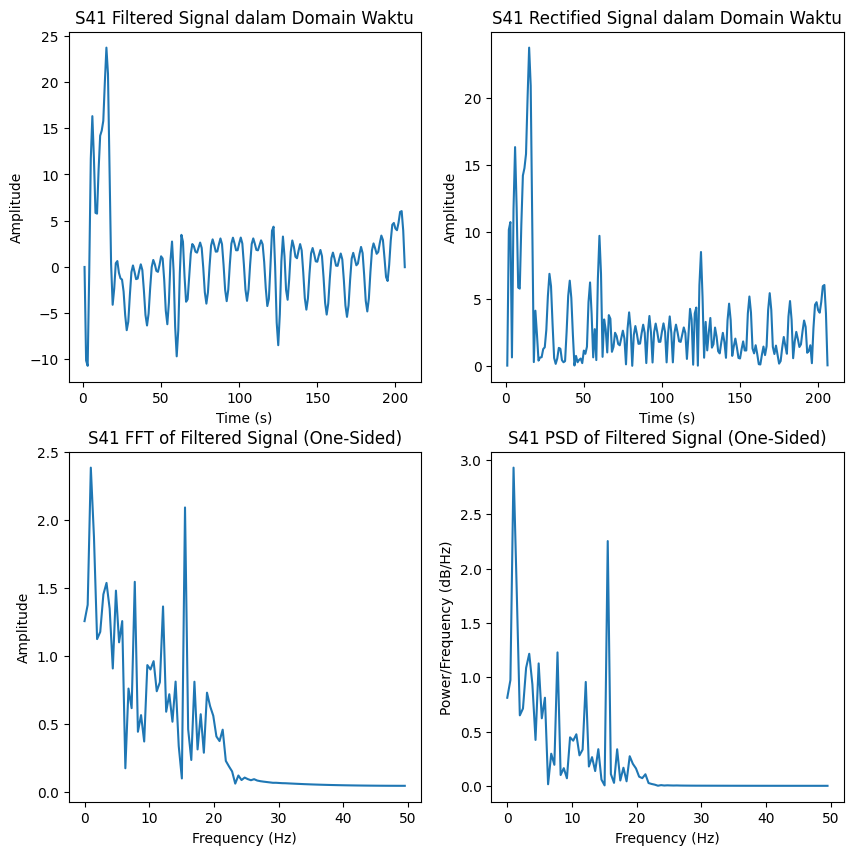

In [13]:
# S41
# Plot the results
fig, axs = plt.subplots(2, 2, figsize=(10,10))

axs[0, 0].plot(time, S41_filtered_signal)
axs[0, 0].set_title('S41 Filtered Signal dalam Domain Waktu')
axs[0, 0].set_xlabel('Time (s)')
axs[0, 0].set_ylabel('Amplitude')

axs[0, 1].plot(time, S41_rectified_signal)
axs[0, 1].set_title('S41 Rectified Signal dalam Domain Waktu')
axs[0, 1].set_xlabel('Time (s)')
axs[0, 1].set_ylabel('Amplitude')

axs[1, 0].plot(S41_freq, S41_fft_amp)
axs[1, 0].set_title('S41 FFT of Filtered Signal (One-Sided)')
axs[1, 0].set_xlabel('Frequency (Hz)')
axs[1, 0].set_ylabel('Amplitude')

axs[1, 1].plot(S41_freq_psd, S41_psd_one_sided)
axs[1, 1].set_title('S41 PSD of Filtered Signal (One-Sided)')
axs[1, 1].set_xlabel('Frequency (Hz)')
axs[1, 1].set_ylabel('Power/Frequency (dB/Hz)')

plt.savefig('Skin_4cm_sampel_1.png', dpi=300)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

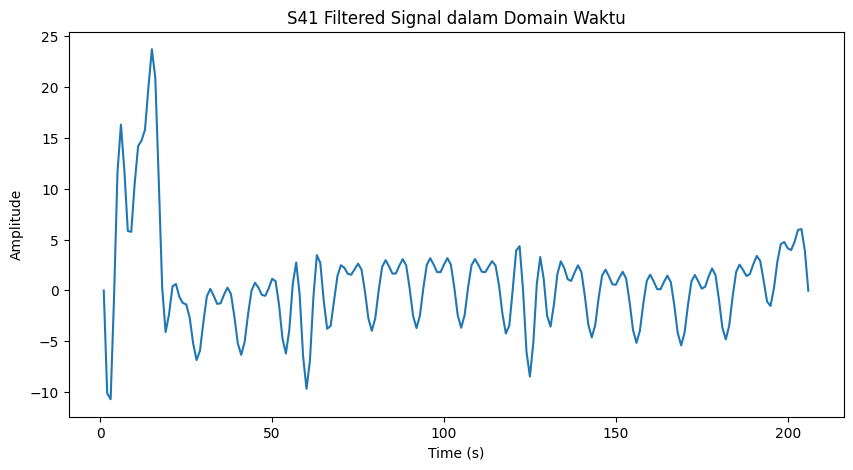

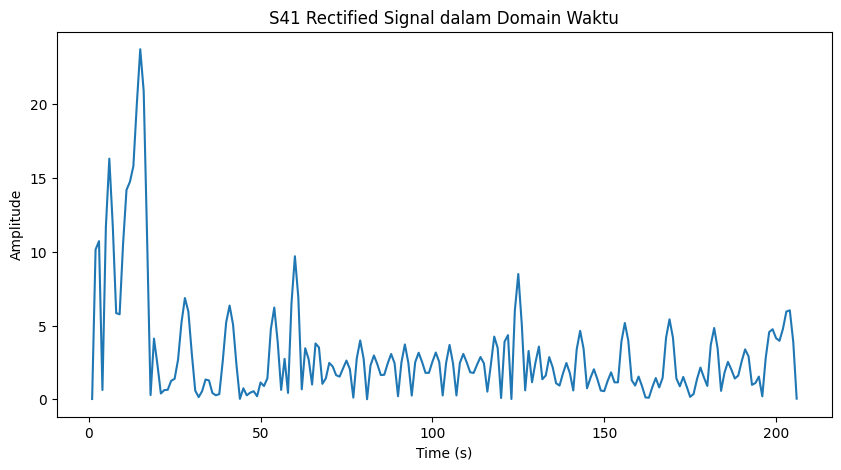

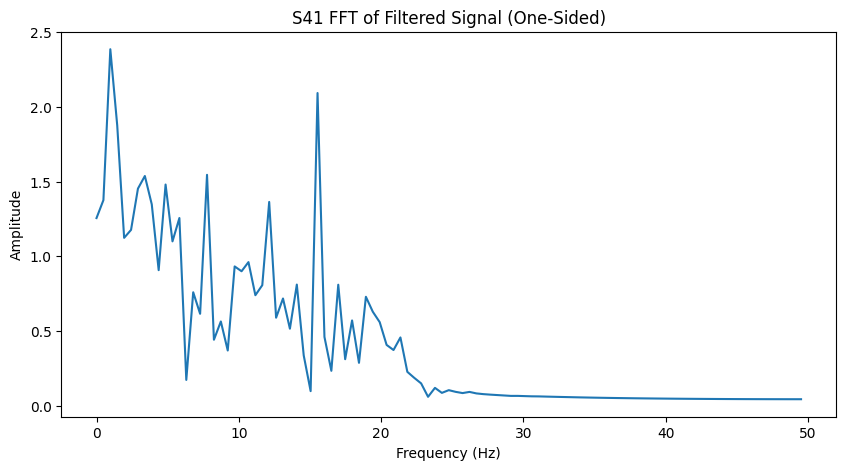

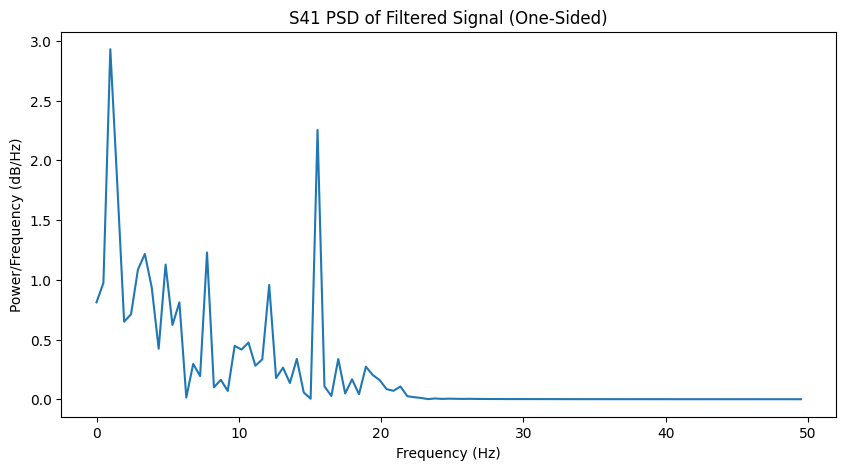

In [14]:
plt.figure(figsize=(10,5))
plt.plot(time, S41_filtered_signal)
plt.title('S41 Filtered Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')


plt.figure(figsize=(10,5))
plt.plot(time, S41_rectified_signal)
plt.title('S41 Rectified Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')


plt.figure(figsize=(10,5))
plt.plot(S41_freq, S41_fft_amp)
plt.title('S41 FFT of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')


plt.figure(figsize=(10,5))
plt.plot(S41_freq_psd, S41_psd_one_sided)
plt.title('S41 PSD of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

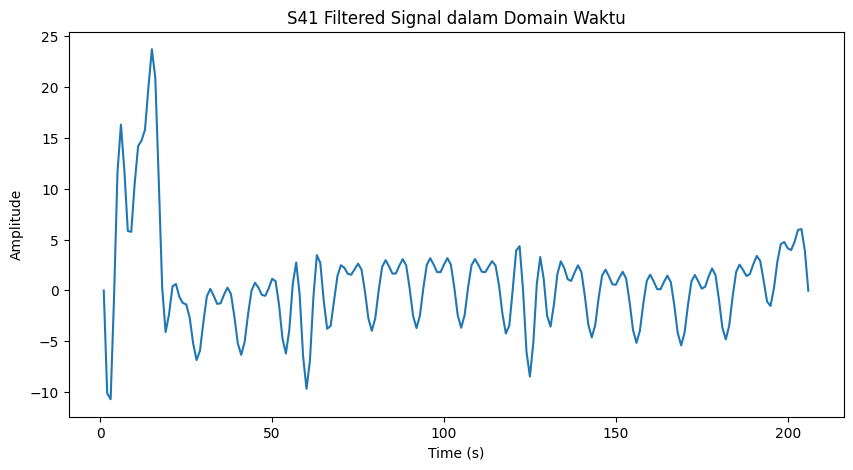

In [15]:
plt.figure(figsize=(10,5))
plt.plot(time, S41_filtered_signal)
plt.title('S41 Filtered Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

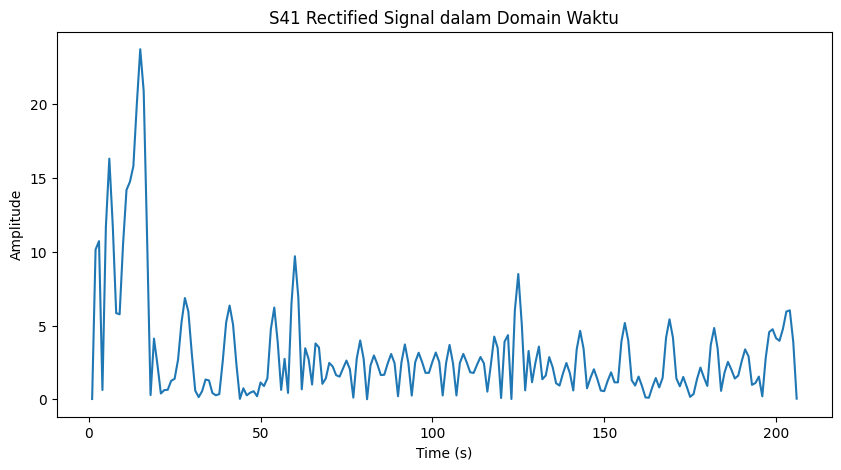

In [16]:
plt.figure(figsize=(10,5))
plt.plot(time, S41_rectified_signal)
plt.title('S41 Rectified Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

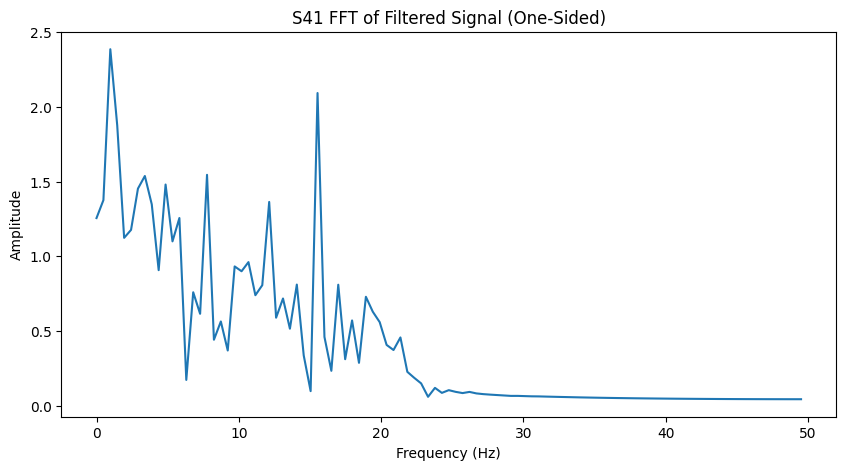

In [17]:
plt.figure(figsize=(10,5))
plt.plot(S41_freq, S41_fft_amp)
plt.title('S41 FFT of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

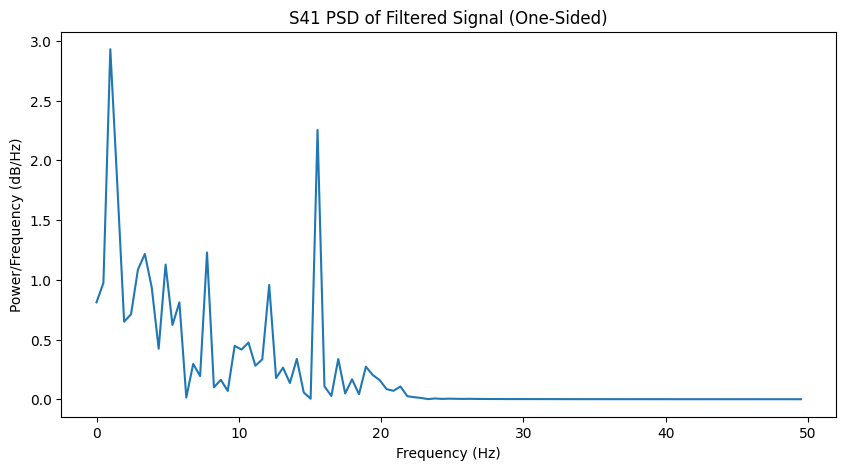

In [18]:
plt.figure(figsize=(10,5))
plt.plot(S41_freq_psd, S41_psd_one_sided)
plt.title('S41 PSD of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.show

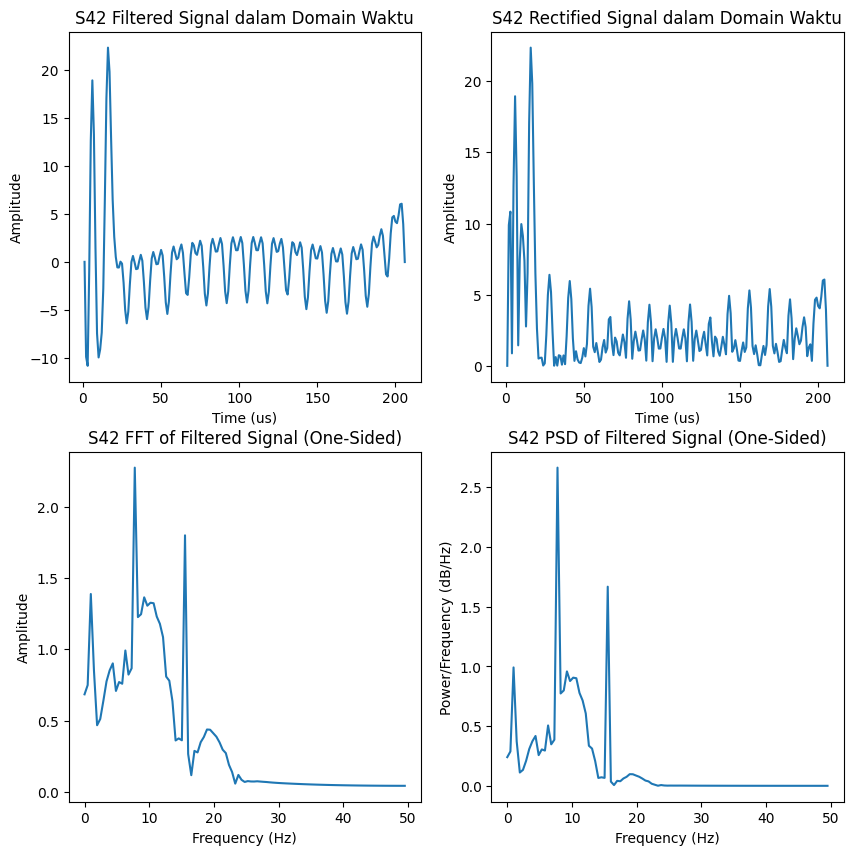

In [19]:
# S42
# Plot the results
fig, axs = plt.subplots(2, 2, figsize=(10,10))

axs[0, 0].plot(time, S42_filtered_signal)
axs[0, 0].set_title('S42 Filtered Signal dalam Domain Waktu')
axs[0, 0].set_xlabel('Time (us)')
axs[0, 0].set_ylabel('Amplitude')

axs[0, 1].plot(time, S42_rectified_signal)
axs[0, 1].set_title('S42 Rectified Signal dalam Domain Waktu')
axs[0, 1].set_xlabel('Time (us)')
axs[0, 1].set_ylabel('Amplitude')

axs[1, 0].plot(S42_freq, S42_fft_amp)
axs[1, 0].set_title('S42 FFT of Filtered Signal (One-Sided)')
axs[1, 0].set_xlabel('Frequency (Hz)')
axs[1, 0].set_ylabel('Amplitude')

axs[1, 1].plot(S42_freq_psd, S42_psd_one_sided)
axs[1, 1].set_title('S42 PSD of Filtered Signal (One-Sided)')
axs[1, 1].set_xlabel('Frequency (Hz)')
axs[1, 1].set_ylabel('Power/Frequency (dB/Hz)')

plt.savefig('Skin_4cm_sampel_2.png', dpi=300)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

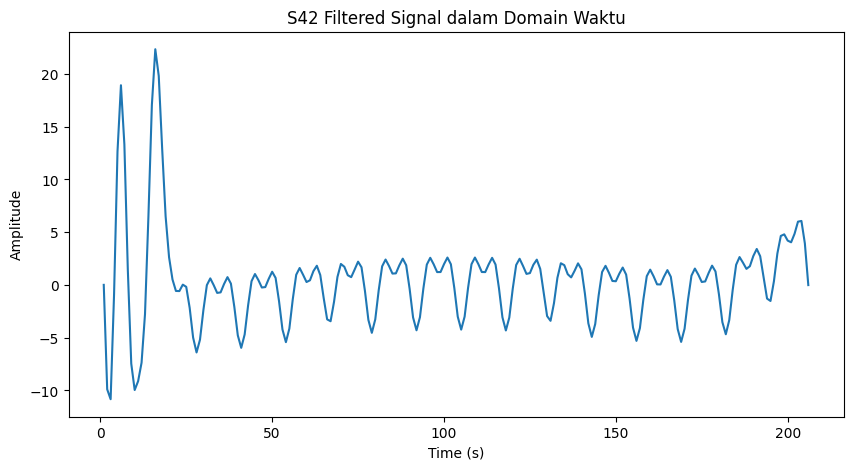

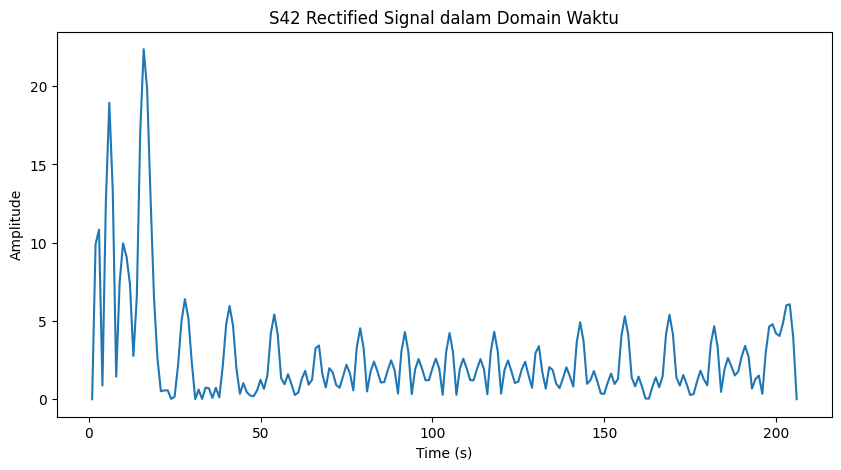

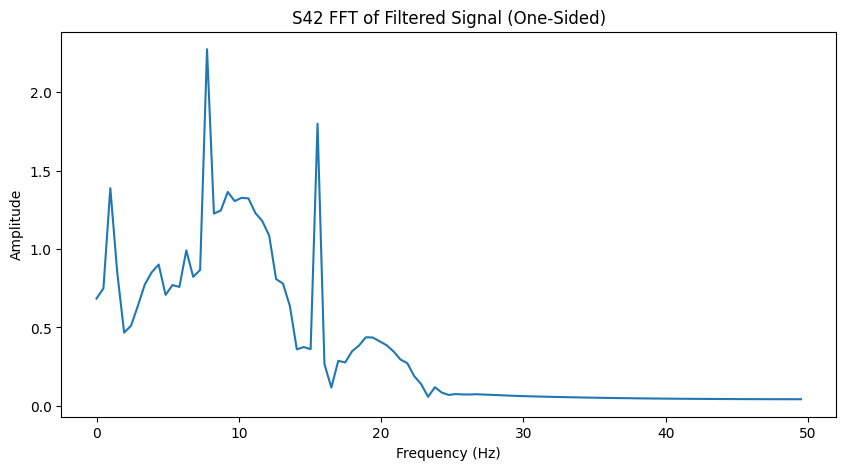

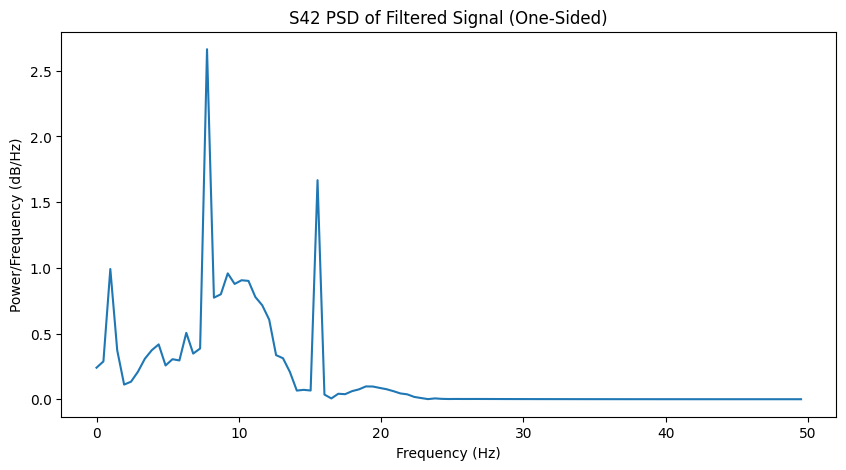

In [20]:
plt.figure(figsize=(10,5))
plt.plot(time, S42_filtered_signal)
plt.title('S42 Filtered Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')


plt.figure(figsize=(10,5))
plt.plot(time, S42_rectified_signal)
plt.title('S42 Rectified Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')


plt.figure(figsize=(10,5))
plt.plot(S42_freq, S42_fft_amp)
plt.title('S42 FFT of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')


plt.figure(figsize=(10,5))
plt.plot(S42_freq_psd, S42_psd_one_sided)
plt.title('S42 PSD of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.show

Text(0, 0.5, 'Amplitude')

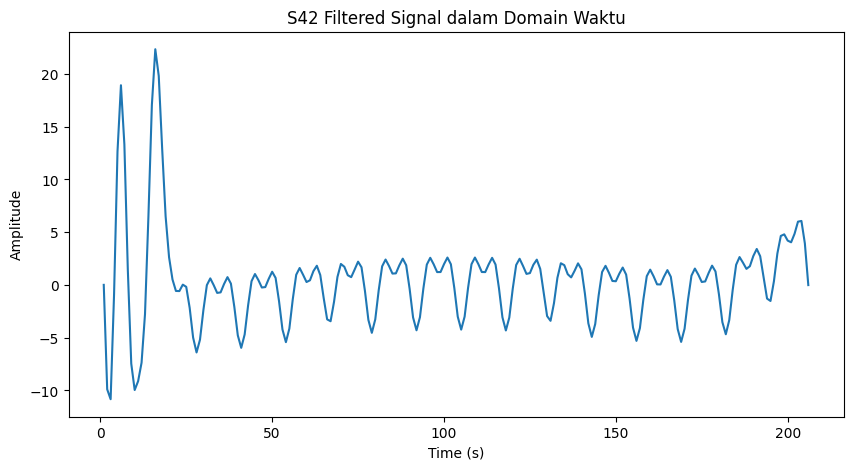

In [21]:
plt.figure(figsize=(10,5))
plt.plot(time, S42_filtered_signal)
plt.title('S42 Filtered Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

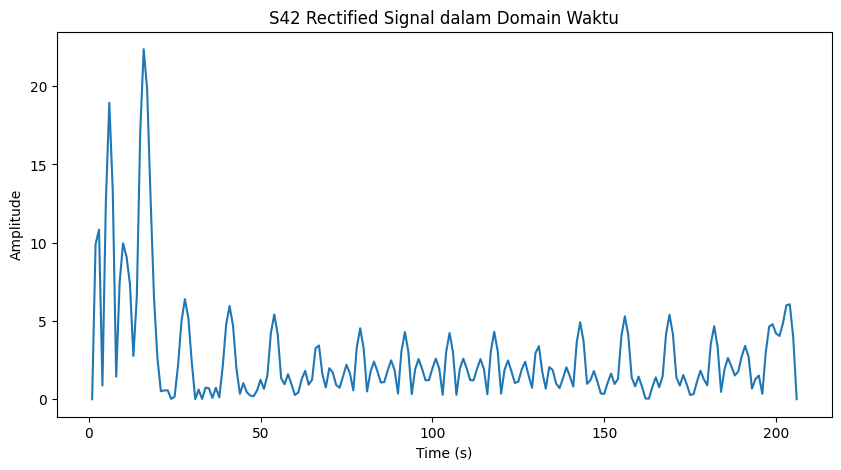

In [22]:
plt.figure(figsize=(10,5))
plt.plot(time, S42_rectified_signal)
plt.title('S42 Rectified Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

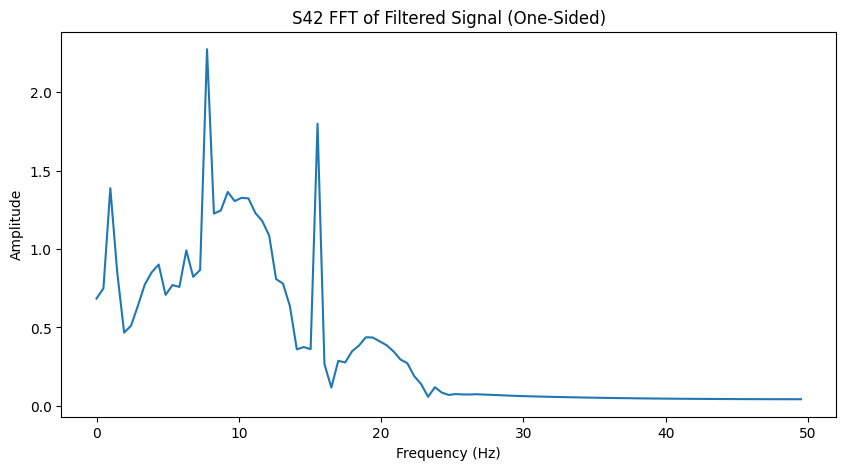

In [23]:
plt.figure(figsize=(10,5))
plt.plot(S42_freq, S42_fft_amp)
plt.title('S42 FFT of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

<function matplotlib.pyplot.show(close=None, block=None)>

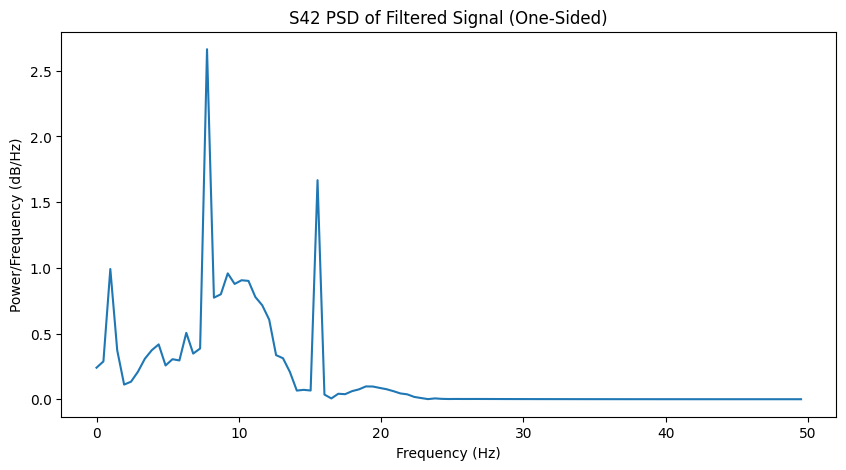

In [24]:
plt.figure(figsize=(10,5))
plt.plot(S42_freq_psd, S42_psd_one_sided)
plt.title('S42 PSD of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.show

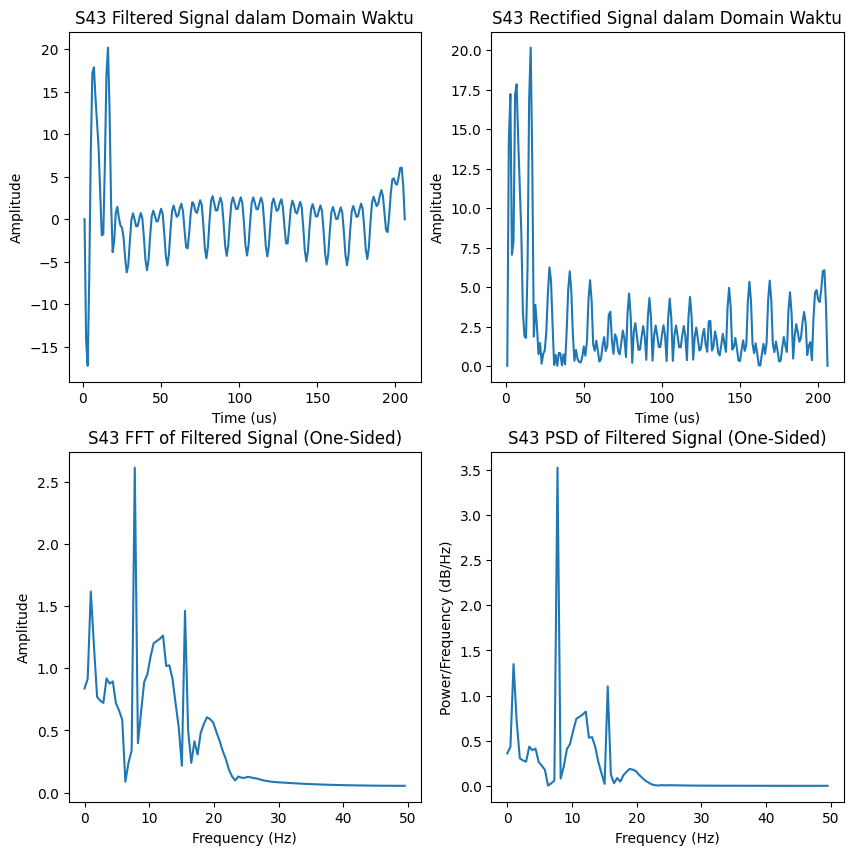

In [25]:
# S43
# Plot the results
fig, axs = plt.subplots(2, 2, figsize=(10,10))

axs[0, 0].plot(time, S43_filtered_signal)
axs[0, 0].set_title('S43 Filtered Signal dalam Domain Waktu')
axs[0, 0].set_xlabel('Time (us)')
axs[0, 0].set_ylabel('Amplitude')

axs[0, 1].plot(time, S43_rectified_signal)
axs[0, 1].set_title('S43 Rectified Signal dalam Domain Waktu')
axs[0, 1].set_xlabel('Time (us)')
axs[0, 1].set_ylabel('Amplitude')

axs[1, 0].plot(S43_freq, S43_fft_amp)
axs[1, 0].set_title('S43 FFT of Filtered Signal (One-Sided)')
axs[1, 0].set_xlabel('Frequency (Hz)')
axs[1, 0].set_ylabel('Amplitude')

axs[1, 1].plot(S43_freq_psd, S43_psd_one_sided)
axs[1, 1].set_title('S43 PSD of Filtered Signal (One-Sided)')
axs[1, 1].set_xlabel('Frequency (Hz)')
axs[1, 1].set_ylabel('Power/Frequency (dB/Hz)')

plt.savefig('Skin_4cm_sampel_3.png', dpi=300)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

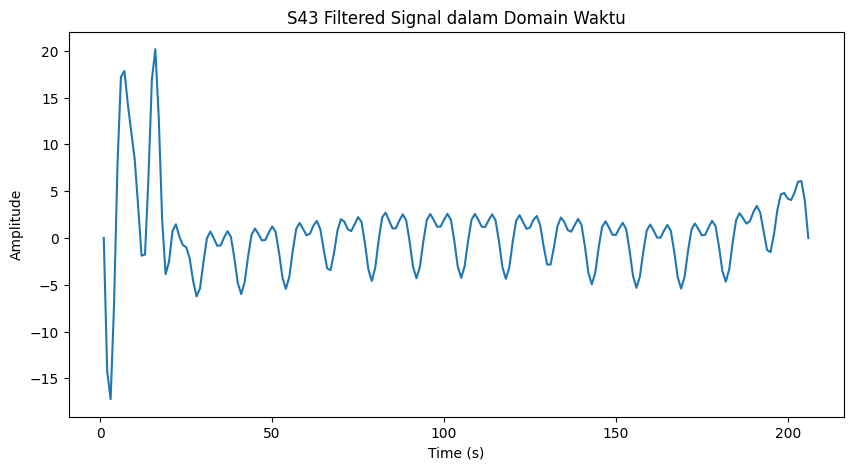

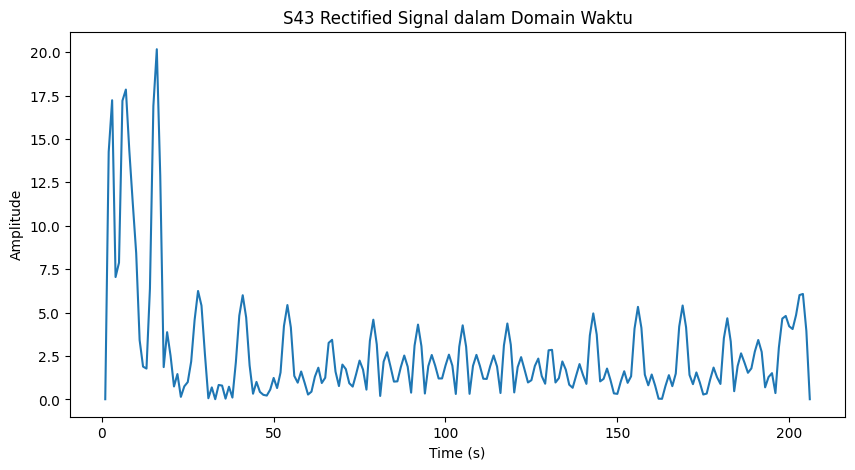

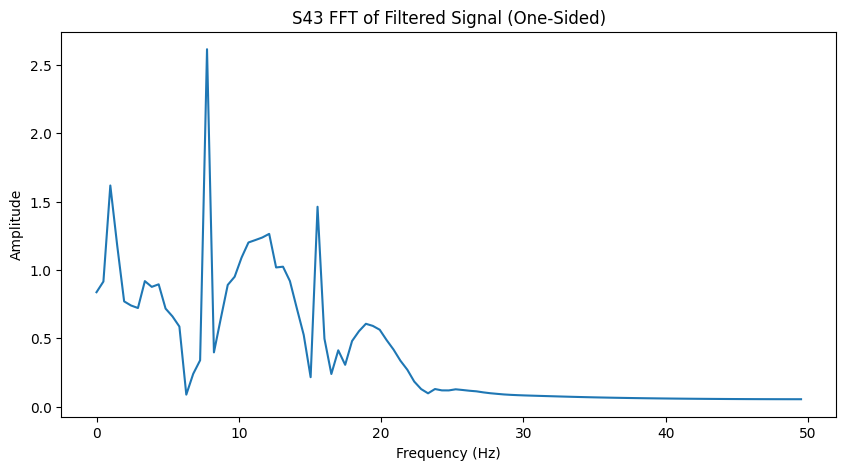

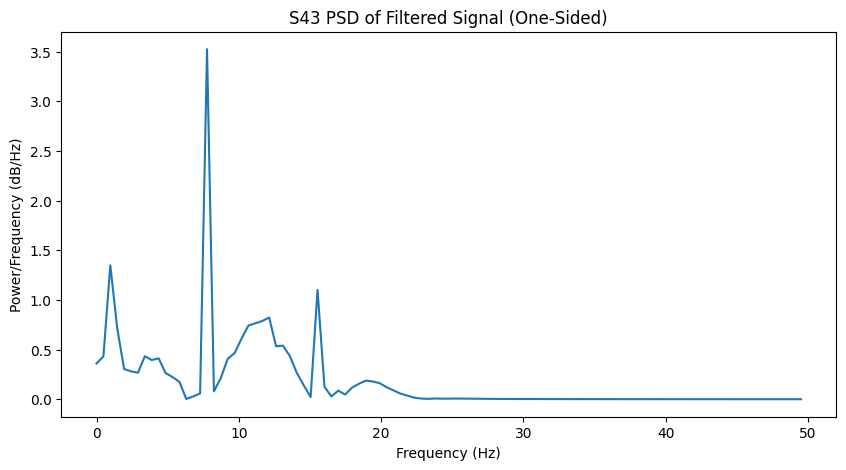

In [26]:
plt.figure(figsize=(10,5))
plt.plot(time, S43_filtered_signal)
plt.title('S43 Filtered Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')


plt.figure(figsize=(10,5))
plt.plot(time, S43_rectified_signal)
plt.title('S43 Rectified Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')


plt.figure(figsize=(10,5))
plt.plot(S43_freq, S43_fft_amp)
plt.title('S43 FFT of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')


plt.figure(figsize=(10,5))
plt.plot(S43_freq_psd, S43_psd_one_sided)
plt.title('S43 PSD of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.show

Text(0, 0.5, 'Amplitude')

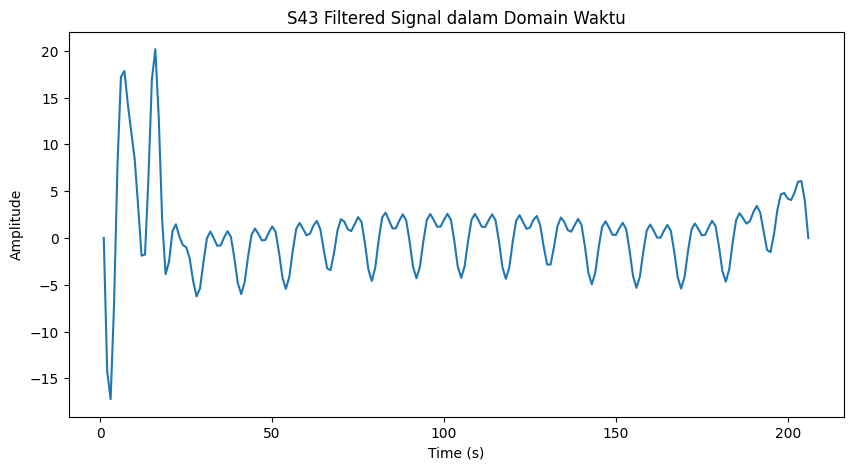

In [27]:
plt.figure(figsize=(10,5))
plt.plot(time, S43_filtered_signal)
plt.title('S43 Filtered Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

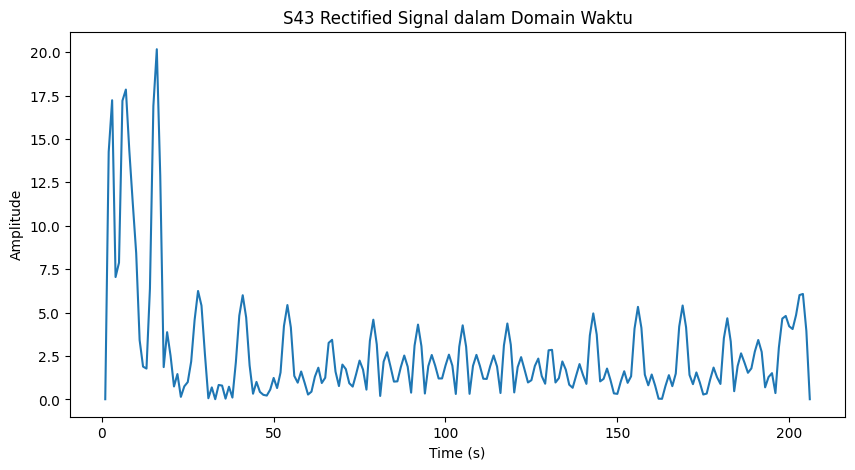

In [28]:
plt.figure(figsize=(10,5))
plt.plot(time, S43_rectified_signal)
plt.title('S43 Rectified Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

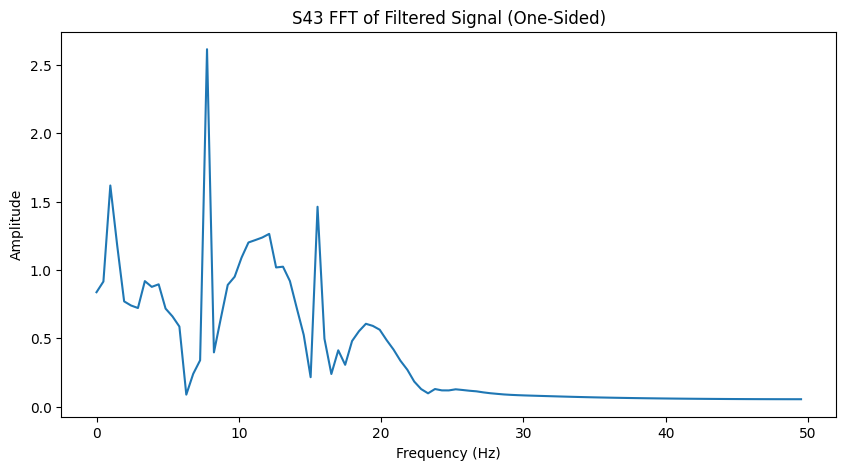

In [29]:
plt.figure(figsize=(10,5))
plt.plot(S43_freq, S43_fft_amp)
plt.title('S43 FFT of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

<function matplotlib.pyplot.show(close=None, block=None)>

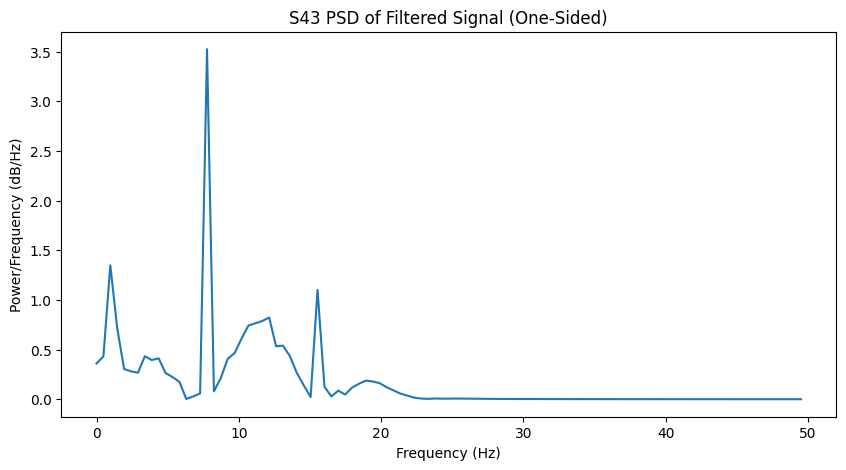

In [30]:
plt.figure(figsize=(10,5))
plt.plot(S43_freq_psd, S43_psd_one_sided)
plt.title('S43 PSD of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.show

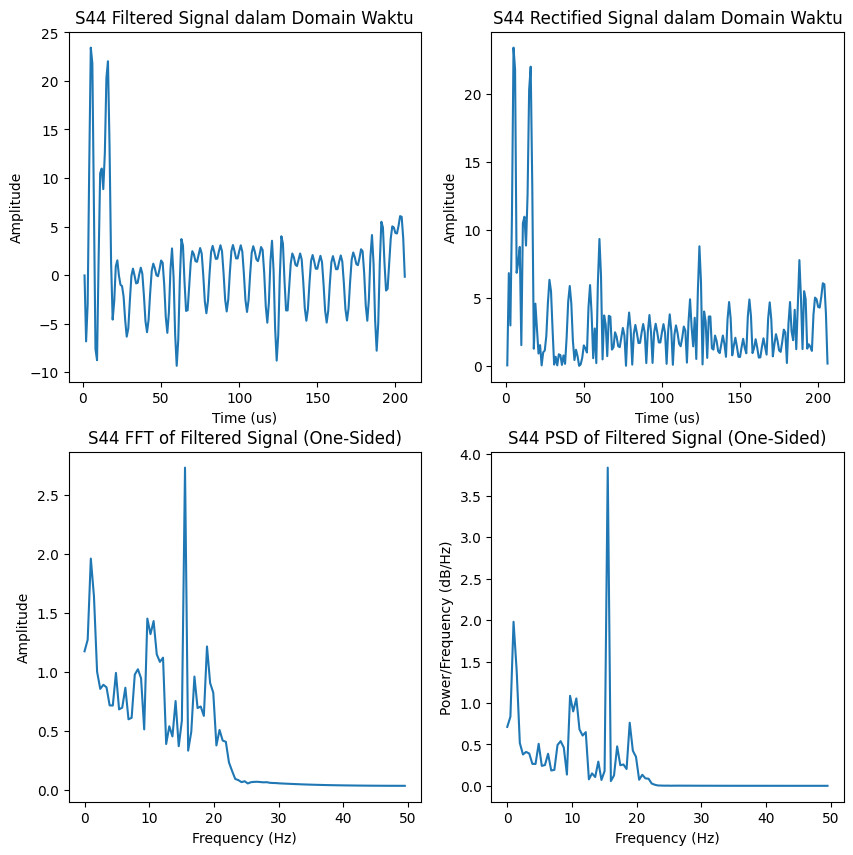

In [31]:
# S44
# Plot the results
fig, axs = plt.subplots(2, 2, figsize=(10,10))

axs[0, 0].plot(time, S44_filtered_signal)
axs[0, 0].set_title('S44 Filtered Signal dalam Domain Waktu')
axs[0, 0].set_xlabel('Time (us)')
axs[0, 0].set_ylabel('Amplitude')

axs[0, 1].plot(time, S44_rectified_signal)
axs[0, 1].set_title('S44 Rectified Signal dalam Domain Waktu')
axs[0, 1].set_xlabel('Time (us)')
axs[0, 1].set_ylabel('Amplitude')

axs[1, 0].plot(S44_freq, S44_fft_amp)
axs[1, 0].set_title('S44 FFT of Filtered Signal (One-Sided)')
axs[1, 0].set_xlabel('Frequency (Hz)')
axs[1, 0].set_ylabel('Amplitude')

axs[1, 1].plot(S44_freq_psd, S44_psd_one_sided)
axs[1, 1].set_title('S44 PSD of Filtered Signal (One-Sided)')
axs[1, 1].set_xlabel('Frequency (Hz)')
axs[1, 1].set_ylabel('Power/Frequency (dB/Hz)')

plt.savefig('Skin_4cm_sampel_4.png', dpi=300)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

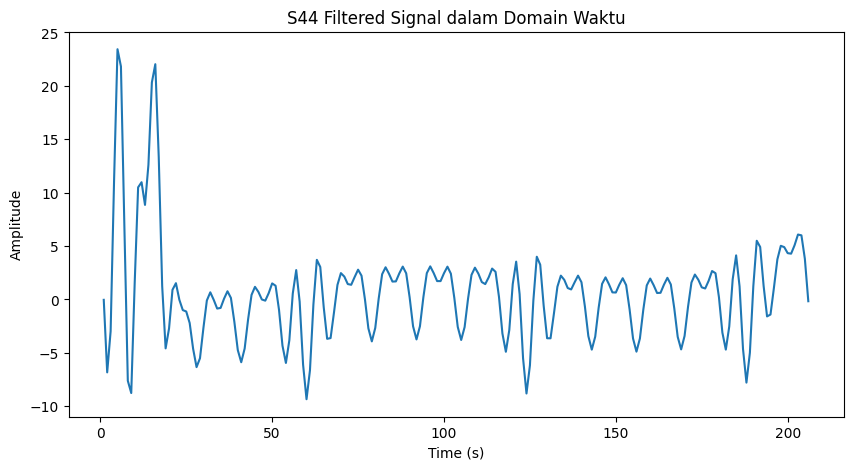

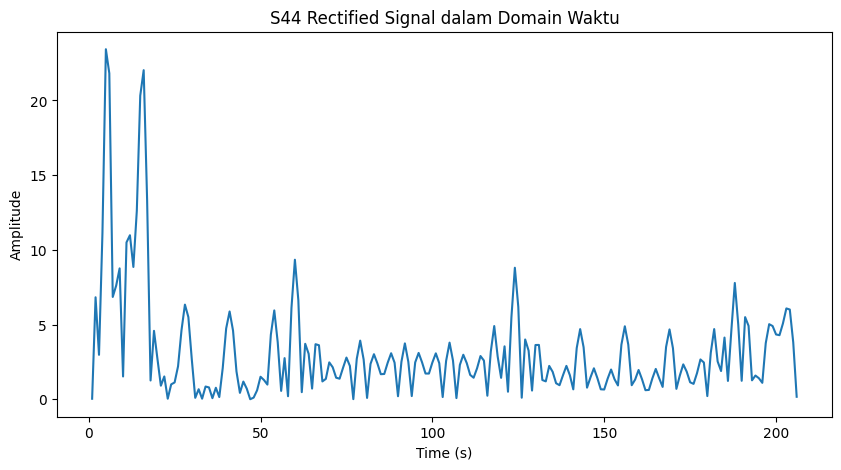

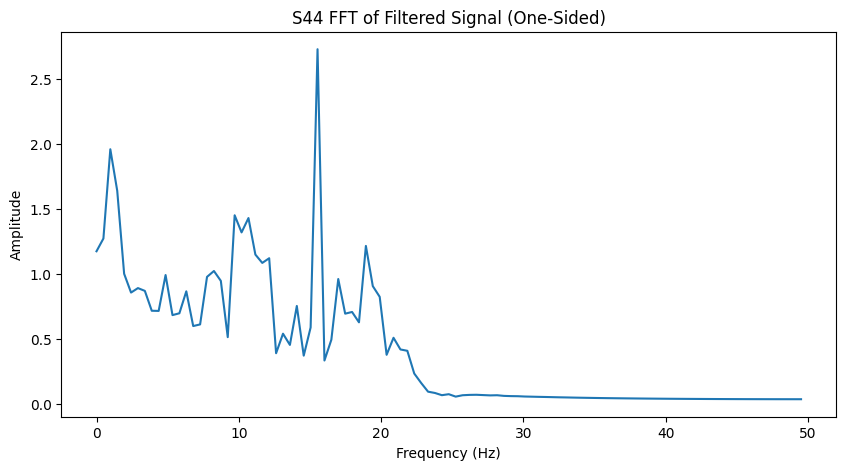

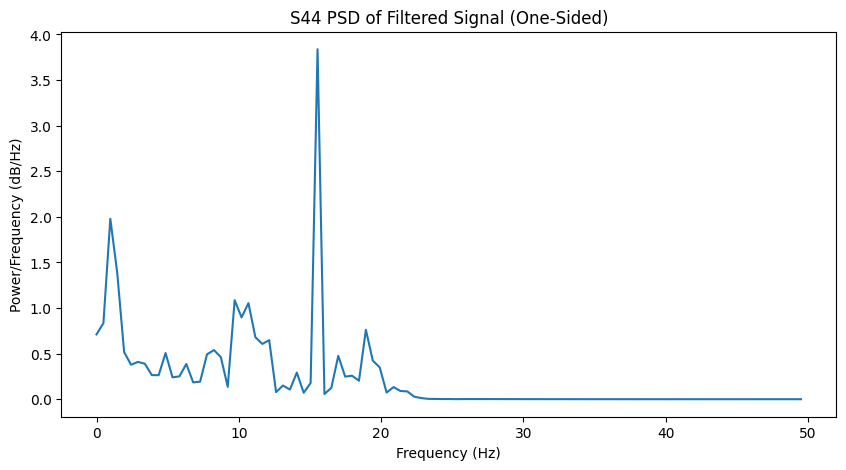

In [32]:
plt.figure(figsize=(10,5))
plt.plot(time, S44_filtered_signal)
plt.title('S44 Filtered Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')


plt.figure(figsize=(10,5))
plt.plot(time, S44_rectified_signal)
plt.title('S44 Rectified Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')


plt.figure(figsize=(10,5))
plt.plot(S44_freq, S44_fft_amp)
plt.title('S44 FFT of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')


plt.figure(figsize=(10,5))
plt.plot(S44_freq_psd, S44_psd_one_sided)
plt.title('S44 PSD of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.show

Text(0, 0.5, 'Amplitude')

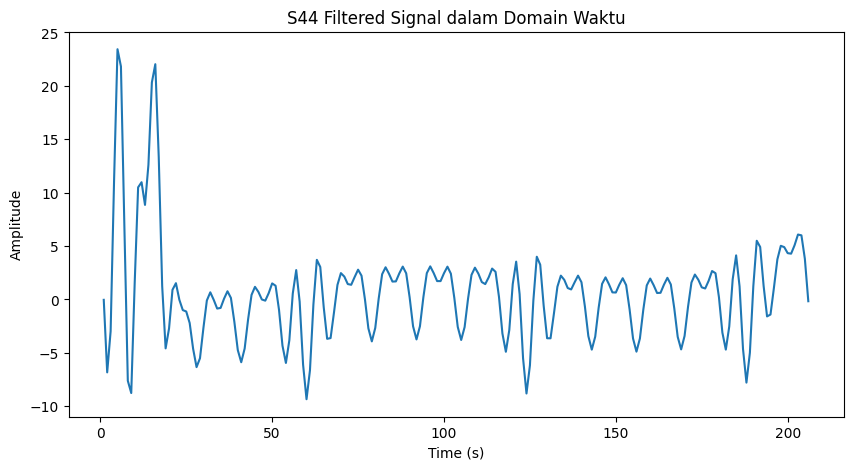

In [33]:
plt.figure(figsize=(10,5))
plt.plot(time, S44_filtered_signal)
plt.title('S44 Filtered Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

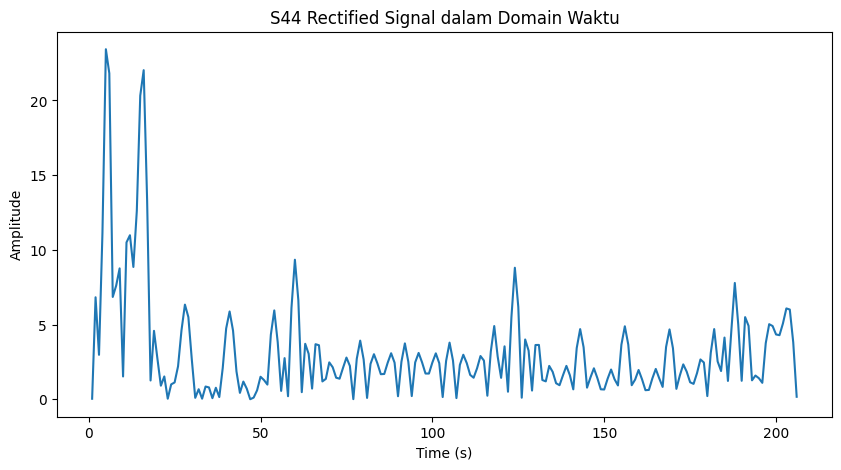

In [34]:
plt.figure(figsize=(10,5))
plt.plot(time, S44_rectified_signal)
plt.title('S44 Rectified Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

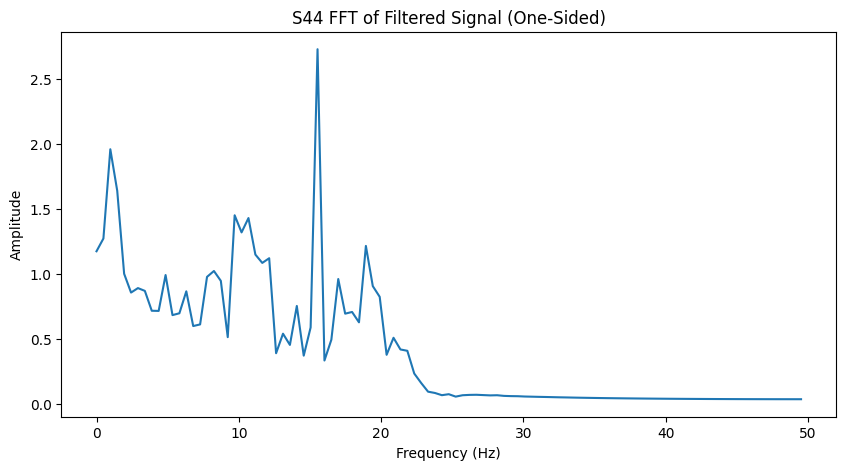

In [35]:
plt.figure(figsize=(10,5))
plt.plot(S44_freq, S44_fft_amp)
plt.title('S44 FFT of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

<function matplotlib.pyplot.show(close=None, block=None)>

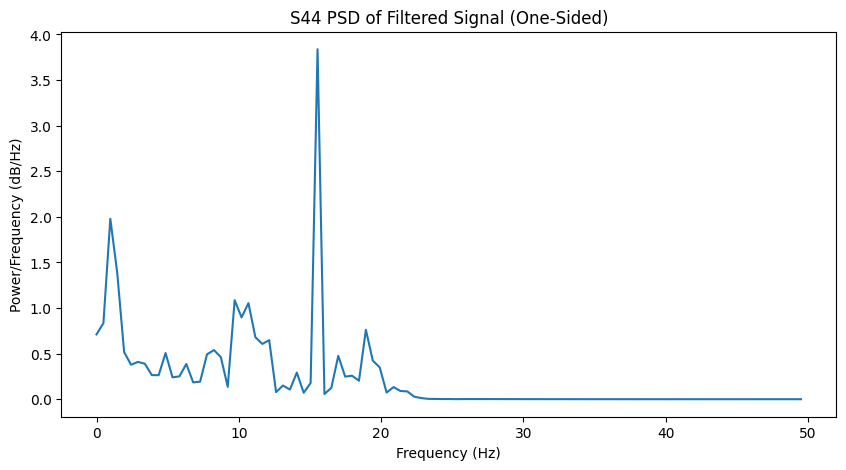

In [36]:
plt.figure(figsize=(10,5))
plt.plot(S44_freq_psd, S44_psd_one_sided)
plt.title('S44 PSD of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.show

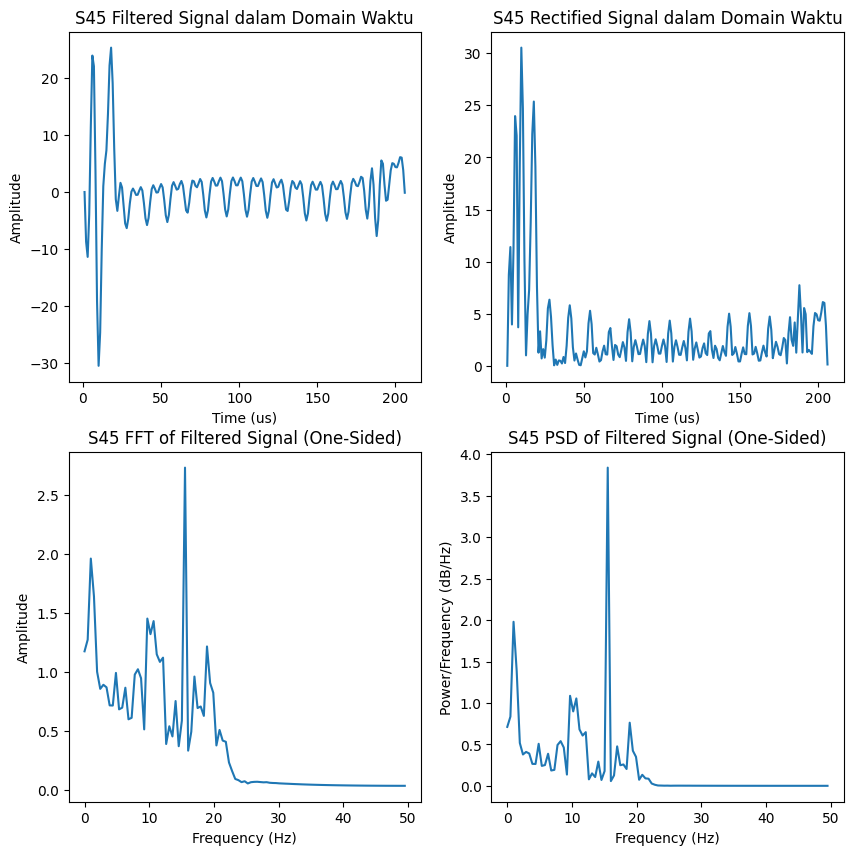

In [37]:
# S45
# Plot the results
fig, axs = plt.subplots(2, 2, figsize=(10,10))

axs[0, 0].plot(time, S45_filtered_signal)
axs[0, 0].set_title('S45 Filtered Signal dalam Domain Waktu')
axs[0, 0].set_xlabel('Time (us)')
axs[0, 0].set_ylabel('Amplitude')

axs[0, 1].plot(time, S45_rectified_signal)
axs[0, 1].set_title('S45 Rectified Signal dalam Domain Waktu')
axs[0, 1].set_xlabel('Time (us)')
axs[0, 1].set_ylabel('Amplitude')

axs[1, 0].plot(S45_freq, S45_fft_amp)
axs[1, 0].set_title('S45 FFT of Filtered Signal (One-Sided)')
axs[1, 0].set_xlabel('Frequency (Hz)')
axs[1, 0].set_ylabel('Amplitude')

axs[1, 1].plot(S45_freq_psd, S45_psd_one_sided)
axs[1, 1].set_title('S45 PSD of Filtered Signal (One-Sided)')
axs[1, 1].set_xlabel('Frequency (Hz)')
axs[1, 1].set_ylabel('Power/Frequency (dB/Hz)')

plt.savefig('Skin_4cm_sampel_5.png', dpi=300)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

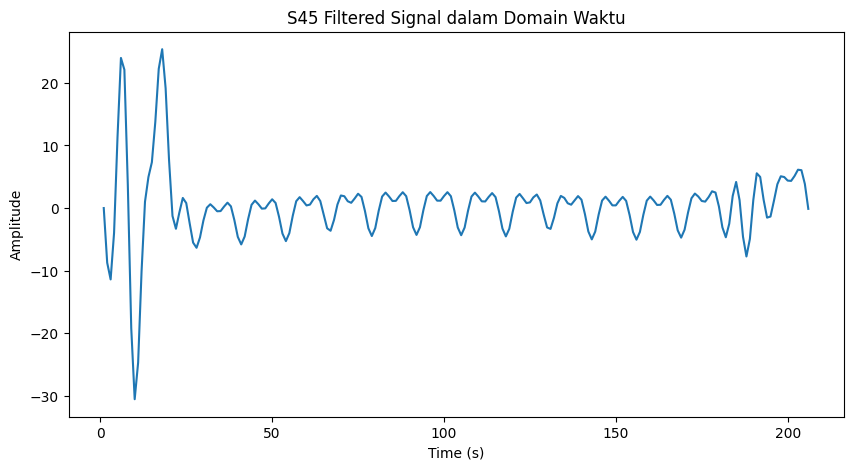

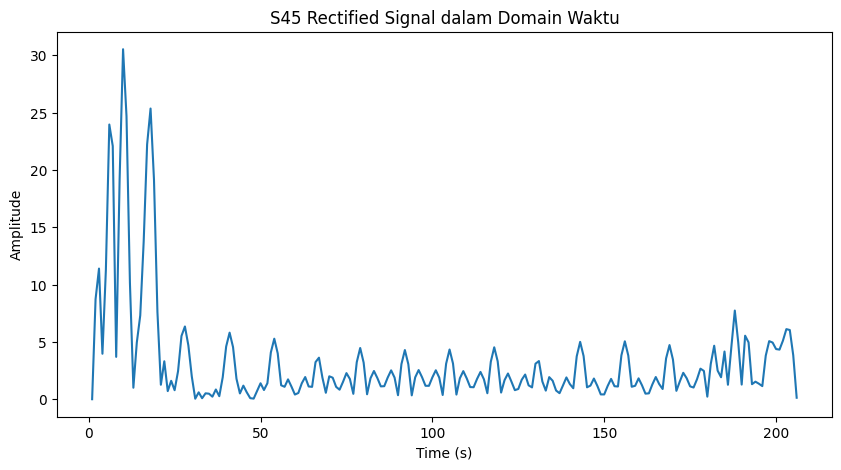

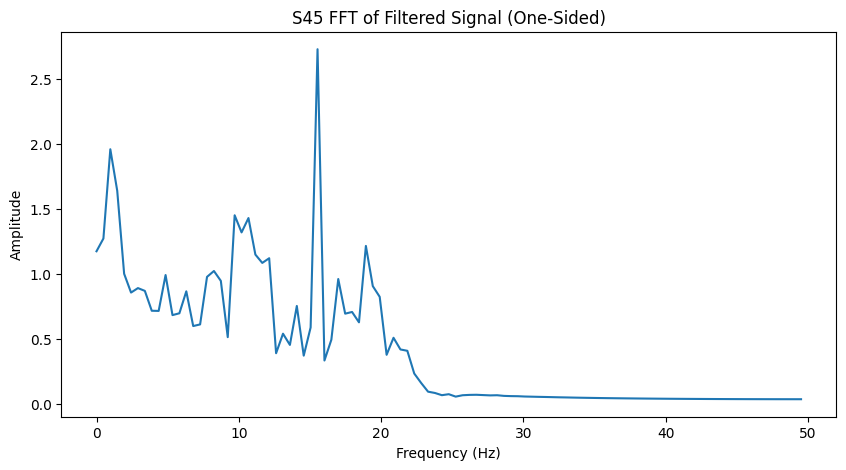

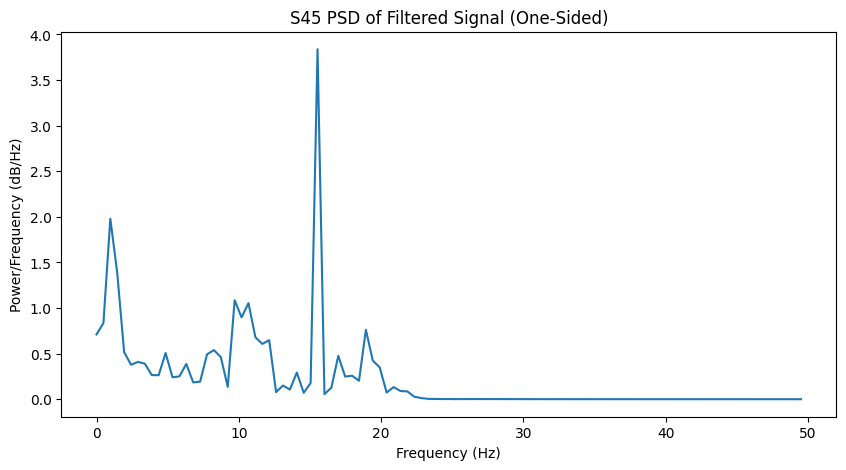

In [38]:
plt.figure(figsize=(10,5))
plt.plot(time, S45_filtered_signal)
plt.title('S45 Filtered Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')


plt.figure(figsize=(10,5))
plt.plot(time, S45_rectified_signal)
plt.title('S45 Rectified Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')


plt.figure(figsize=(10,5))
plt.plot(S45_freq, S45_fft_amp)
plt.title('S45 FFT of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')


plt.figure(figsize=(10,5))
plt.plot(S45_freq_psd, S45_psd_one_sided)
plt.title('S45 PSD of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.show

Text(0, 0.5, 'Amplitude')

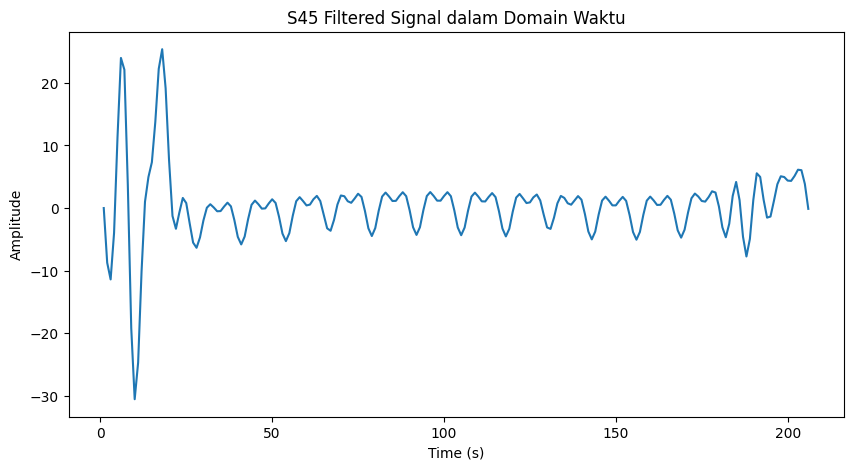

In [39]:
plt.figure(figsize=(10,5))
plt.plot(time, S45_filtered_signal)
plt.title('S45 Filtered Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

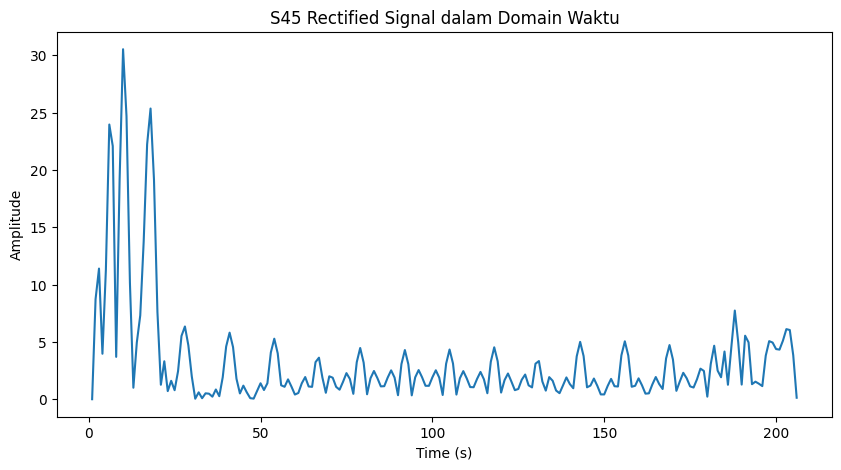

In [40]:
plt.figure(figsize=(10,5))
plt.plot(time, S45_rectified_signal)
plt.title('S45 Rectified Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

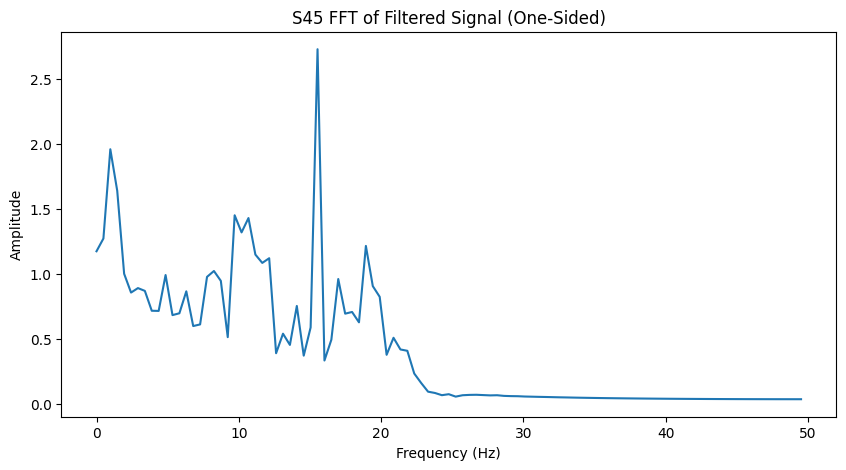

In [41]:
plt.figure(figsize=(10,5))
plt.plot(S45_freq, S45_fft_amp)
plt.title('S45 FFT of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

<function matplotlib.pyplot.show(close=None, block=None)>

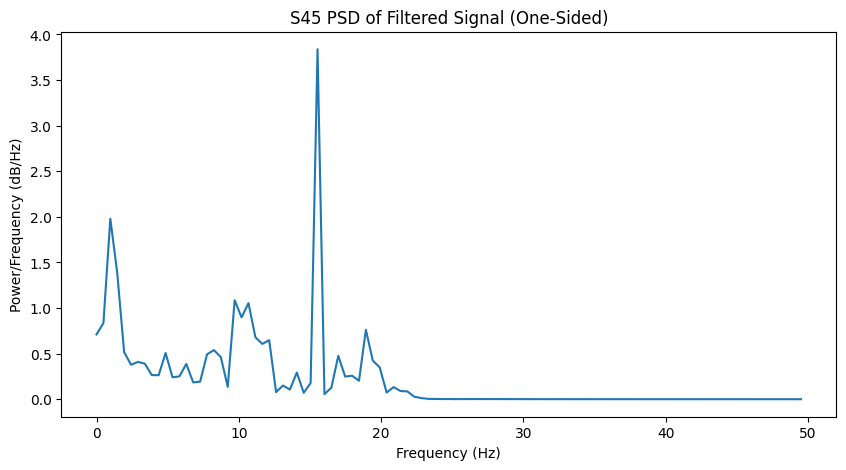

In [42]:
plt.figure(figsize=(10,5))
plt.plot(S45_freq_psd, S45_psd_one_sided)
plt.title('S45 PSD of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.show

# SKIN 65 % Jarak 3 cm


## Parameter Filter, Apply Bandpass, Rectify Signal untuk kelima sampel 3 cm

In [43]:
# S31 
# Define the filter parameters
lowcut = 1.0
highcut = 20.0
fs = 100.0
order = 5

# Apply a bandpass filter to the signal
nyquist = 0.5 * fs
low = lowcut / nyquist
high = highcut / nyquist
b, a = signal.butter(order, [low, high], btype='band')
S31_filtered_signal = signal.filtfilt(b, a, S31_signal_data)

# Rectify the signal (take only the positive values)
S31_rectified_signal = np.abs(S31_filtered_signal)

In [44]:
# S32 
# Define the filter parameters
lowcut = 1.0
highcut = 20.0
fs = 100.0
order = 5

# Apply a bandpass filter to the signal
nyquist = 0.5 * fs
low = lowcut / nyquist
high = highcut / nyquist
b, a = signal.butter(order, [low, high], btype='band')
S32_filtered_signal = signal.filtfilt(b, a, S32_signal_data)

# Rectify the signal (take only the positive values)
S32_rectified_signal = np.abs(S32_filtered_signal)

In [45]:
# S33 
# Define the filter parameters
lowcut = 1.0
highcut = 20.0
fs = 100.0
order = 5

# Apply a bandpass filter to the signal
nyquist = 0.5 * fs
low = lowcut / nyquist
high = highcut / nyquist
b, a = signal.butter(order, [low, high], btype='band')
S33_filtered_signal = signal.filtfilt(b, a, S33_signal_data)

# Rectify the signal (take only the positive values)
S33_rectified_signal = np.abs(S33_filtered_signal)

In [46]:
# S34 
# Define the filter parameters
lowcut = 1.0
highcut = 20.0
fs = 100.0
order = 5

# Apply a bandpass filter to the signal
nyquist = 0.5 * fs
low = lowcut / nyquist
high = highcut / nyquist
b, a = signal.butter(order, [low, high], btype='band')
S34_filtered_signal = signal.filtfilt(b, a, S34_signal_data)

# Rectify the signal (take only the positive values)
S34_rectified_signal = np.abs(S34_filtered_signal)

In [47]:
# S35 
# Define the filter parameters
lowcut = 1.0
highcut = 20.0
fs = 100.0
order = 5

# Apply a bandpass filter to the signal
nyquist = 0.5 * fs
low = lowcut / nyquist
high = highcut / nyquist
b, a = signal.butter(order, [low, high], btype='band')
S35_filtered_signal = signal.filtfilt(b, a, S35_signal_data)

# Rectify the signal (take only the positive values)
S35_rectified_signal = np.abs(S35_filtered_signal)

## Tranformasi Fourier, One-sided FFT dan PSD

In [48]:
# S31
# Perform Fourier Transform
S31_signal_fft = np.fft.fft(S31_filtered_signal)
S31_signal_freq = np.fft.fftfreq(len(S31_filtered_signal), 1/fs)

# Melakukan one-sided FFT dengan mengabaikan frekuensi negatif
S31_n = len(S31_filtered_signal)
S31_freq = S31_signal_freq[0:int(S31_n/2)]
S31_fft_amp = np.abs(S31_signal_fft)[0:int(S31_n/2)]/S31_n*2

# Perform power spectral density (PSD) calculation
S31_psd = (1/(fs*S31_n)) * np.square(np.abs(S31_signal_fft[:S31_n//2]))

# Perform one-sided PSD (discard negative frequencies)
S31_freq_psd = S31_signal_freq[0:int(S31_n/2)]
S31_psd_one_sided = S31_psd[0:int(S31_n/2)]

In [49]:
# S32
# Perform Fourier Transform
S32_signal_fft = np.fft.fft(S32_filtered_signal)
S32_signal_freq = np.fft.fftfreq(len(S32_filtered_signal), 1/fs)

# Melakukan one-sided FFT dengan mengabaikan frekuensi negatif
S32_n = len(S32_filtered_signal)
S32_freq = S32_signal_freq[0:int(S32_n/2)]
S32_fft_amp = np.abs(S32_signal_fft)[0:int(S32_n/2)]/S32_n*2

# Perform power spectral density (PSD) calculation
S32_psd = (1/(fs*S32_n)) * np.square(np.abs(S32_signal_fft[:S32_n//2]))

# Perform one-sided PSD (discard negative frequencies)
S32_freq_psd = S32_signal_freq[0:int(S32_n/2)]
S32_psd_one_sided = S32_psd[0:int(S32_n/2)]

In [50]:
# S33
# Perform Fourier Transform
S33_signal_fft = np.fft.fft(S33_filtered_signal)
S33_signal_freq = np.fft.fftfreq(len(S33_filtered_signal), 1/fs)

# Melakukan one-sided FFT dengan mengabaikan frekuensi negatif
S33_n = len(S33_filtered_signal)
S33_freq = S33_signal_freq[0:int(S33_n/2)]
S33_fft_amp = np.abs(S33_signal_fft)[0:int(S33_n/2)]/S33_n*2

# Perform power spectral density (PSD) calculation
S33_psd = (1/(fs*S33_n)) * np.square(np.abs(S33_signal_fft[:S33_n//2]))

# Perform one-sided PSD (discard negative frequencies)
S33_freq_psd = S33_signal_freq[0:int(S33_n/2)]
S33_psd_one_sided = S33_psd[0:int(S33_n/2)]

In [51]:
# S34
# Perform Fourier Transform
S34_signal_fft = np.fft.fft(S34_filtered_signal)
S34_signal_freq = np.fft.fftfreq(len(S34_filtered_signal), 1/fs)

# Melakukan one-sided FFT dengan mengabaikan frekuensi negatif
S34_n = len(S34_filtered_signal)
S34_freq = S34_signal_freq[0:int(S34_n/2)]
S34_fft_amp = np.abs(S34_signal_fft)[0:int(S34_n/2)]/S34_n*2

# Perform power spectral density (PSD) calculation
S34_psd = (1/(fs*S34_n)) * np.square(np.abs(S34_signal_fft[:S34_n//2]))

# Perform one-sided PSD (discard negative frequencies)
S34_freq_psd = S34_signal_freq[0:int(S34_n/2)]
S34_psd_one_sided = S34_psd[0:int(S34_n/2)]

In [52]:
# S35
# Perform Fourier Transform
S35_signal_fft = np.fft.fft(S35_filtered_signal)
S35_signal_freq = np.fft.fftfreq(len(S35_filtered_signal), 1/fs)

# Melakukan one-sided FFT dengan mengabaikan frekuensi negatif
S35_n = len(S35_filtered_signal)
S35_freq = S35_signal_freq[0:int(S35_n/2)]
S35_fft_amp = np.abs(S35_signal_fft)[0:int(S35_n/2)]/S35_n*2

# Perform power spectral density (PSD) calculation
S35_psd = (1/(fs*S35_n)) * np.square(np.abs(S35_signal_fft[:S35_n//2]))

# Perform one-sided PSD (discard negative frequencies)
S35_freq_psd = S35_signal_freq[0:int(S35_n/2)]
S35_psd_one_sided = S35_psd[0:int(S35_n/2)]

# Plot

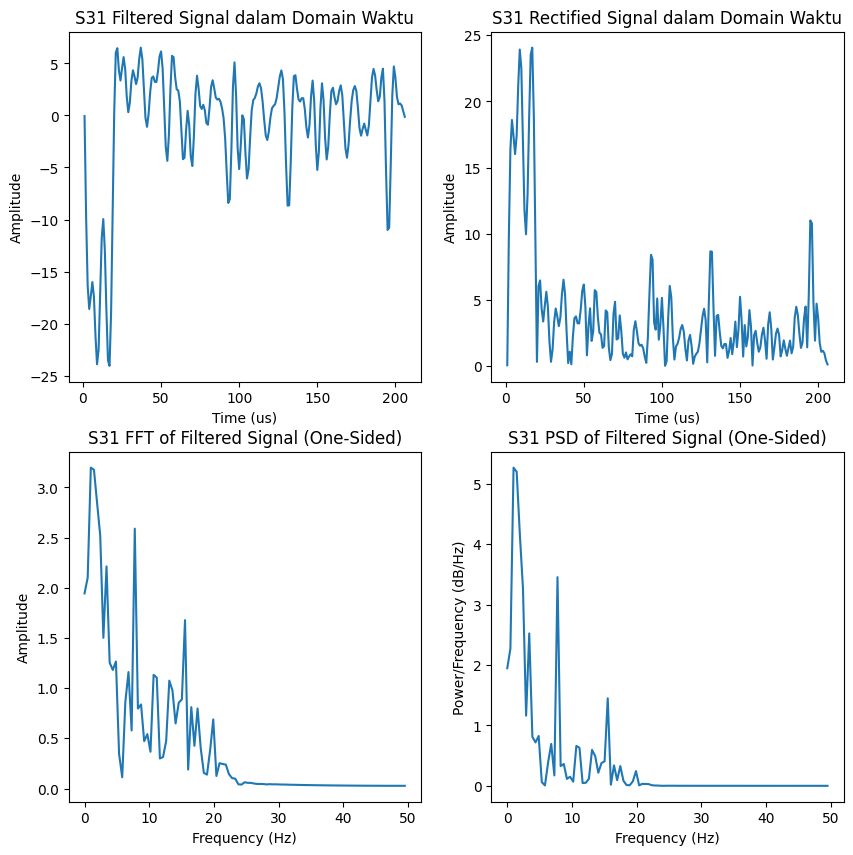

In [53]:
# S31
# Plot the results
fig, axs = plt.subplots(2, 2, figsize=(10,10))

axs[0, 0].plot(time, S31_filtered_signal)
axs[0, 0].set_title('S31 Filtered Signal dalam Domain Waktu')
axs[0, 0].set_xlabel('Time (us)')
axs[0, 0].set_ylabel('Amplitude')

axs[0, 1].plot(time, S31_rectified_signal)
axs[0, 1].set_title('S31 Rectified Signal dalam Domain Waktu')
axs[0, 1].set_xlabel('Time (us)')
axs[0, 1].set_ylabel('Amplitude')


axs[1, 0].plot(S31_freq, S31_fft_amp)
axs[1, 0].set_title('S31 FFT of Filtered Signal (One-Sided)')
axs[1, 0].set_xlabel('Frequency (Hz)')
axs[1, 0].set_ylabel('Amplitude')

axs[1, 1].plot(S31_freq_psd, S31_psd_one_sided)
axs[1, 1].set_title('S31 PSD of Filtered Signal (One-Sided)')
axs[1, 1].set_xlabel('Frequency (Hz)')
axs[1, 1].set_ylabel('Power/Frequency (dB/Hz)')

plt.savefig('Skin_3cm_sampel_1.png', dpi=300)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

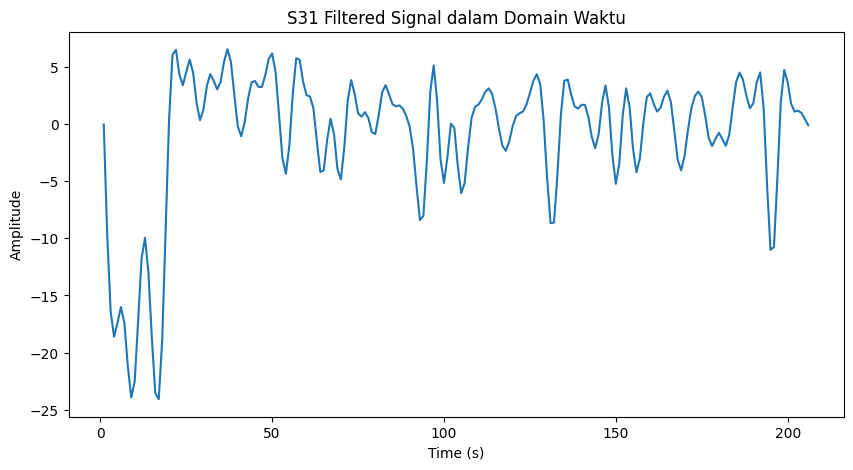

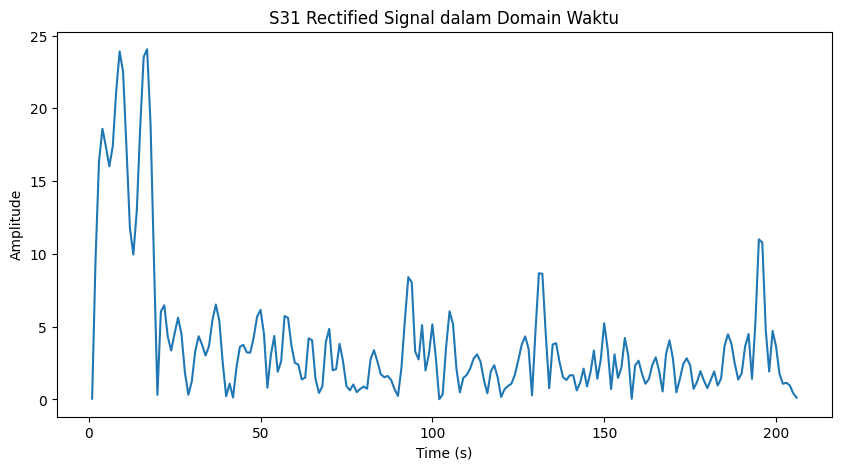

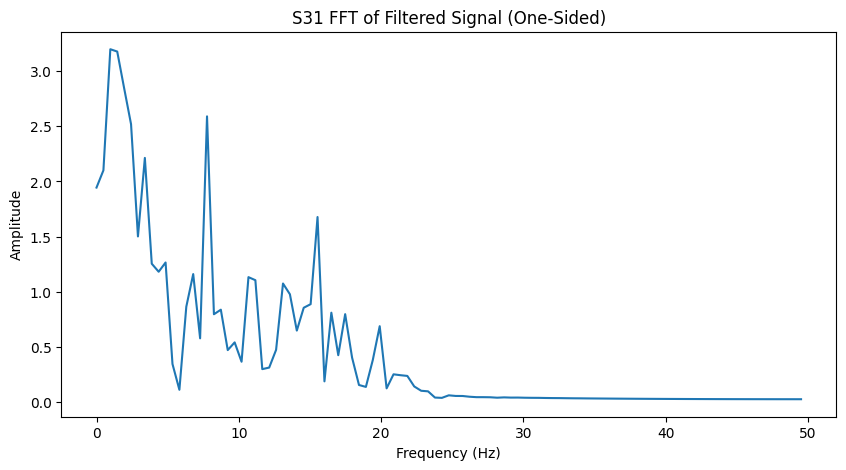

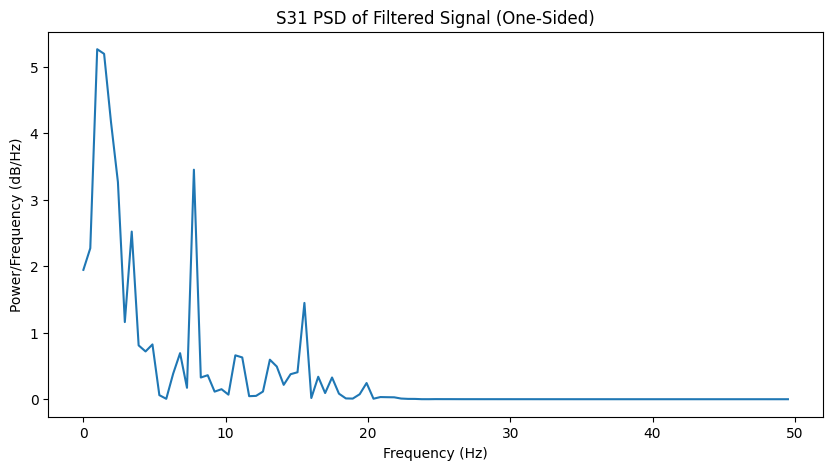

In [54]:
plt.figure(figsize=(10,5))
plt.plot(time, S31_filtered_signal)
plt.title('S31 Filtered Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')


plt.figure(figsize=(10,5))
plt.plot(time, S31_rectified_signal)
plt.title('S31 Rectified Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')


plt.figure(figsize=(10,5))
plt.plot(S31_freq, S31_fft_amp)
plt.title('S31 FFT of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')


plt.figure(figsize=(10,5))
plt.plot(S31_freq_psd, S31_psd_one_sided)
plt.title('S31 PSD of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.show

Text(0, 0.5, 'Amplitude')

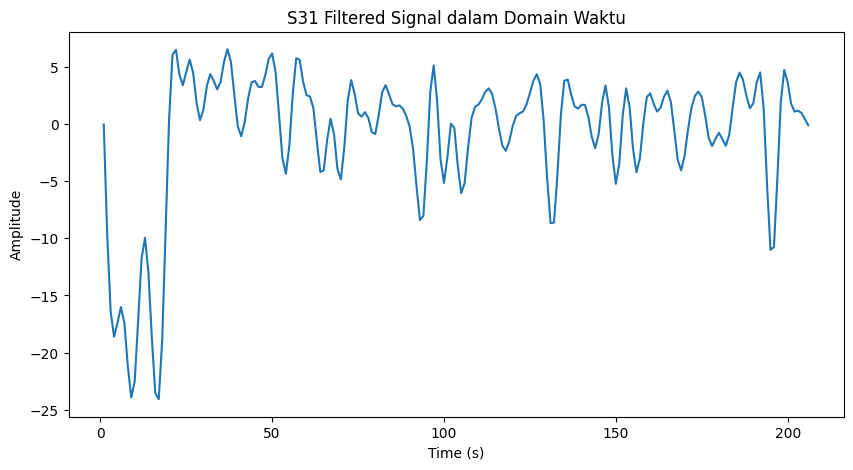

In [55]:
plt.figure(figsize=(10,5))
plt.plot(time, S31_filtered_signal)
plt.title('S31 Filtered Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

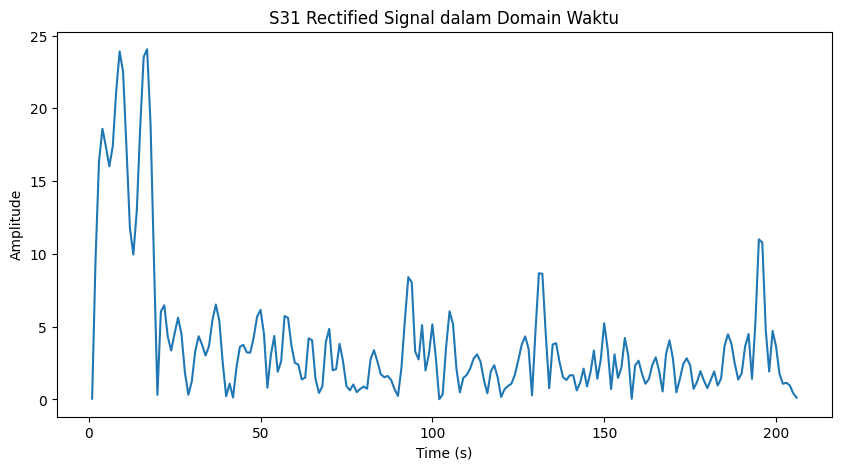

In [56]:
plt.figure(figsize=(10,5))
plt.plot(time, S31_rectified_signal)
plt.title('S31 Rectified Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

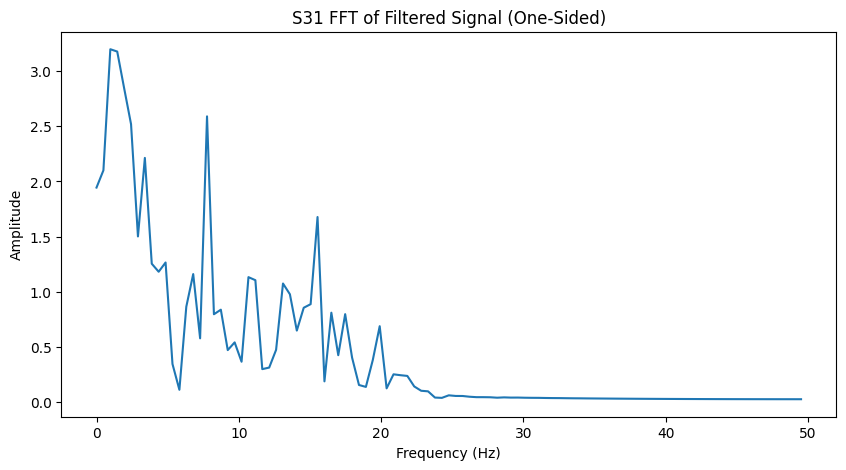

In [57]:
plt.figure(figsize=(10,5))
plt.plot(S31_freq, S31_fft_amp)
plt.title('S31 FFT of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

<function matplotlib.pyplot.show(close=None, block=None)>

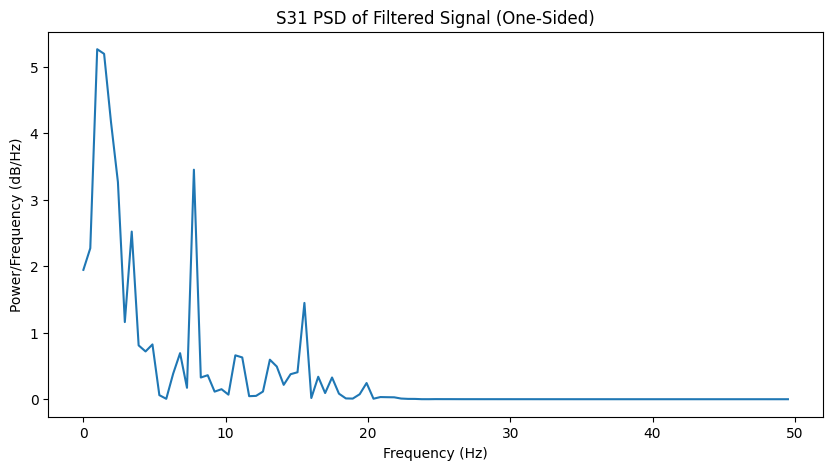

In [58]:
plt.figure(figsize=(10,5))
plt.plot(S31_freq_psd, S31_psd_one_sided)
plt.title('S31 PSD of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.show

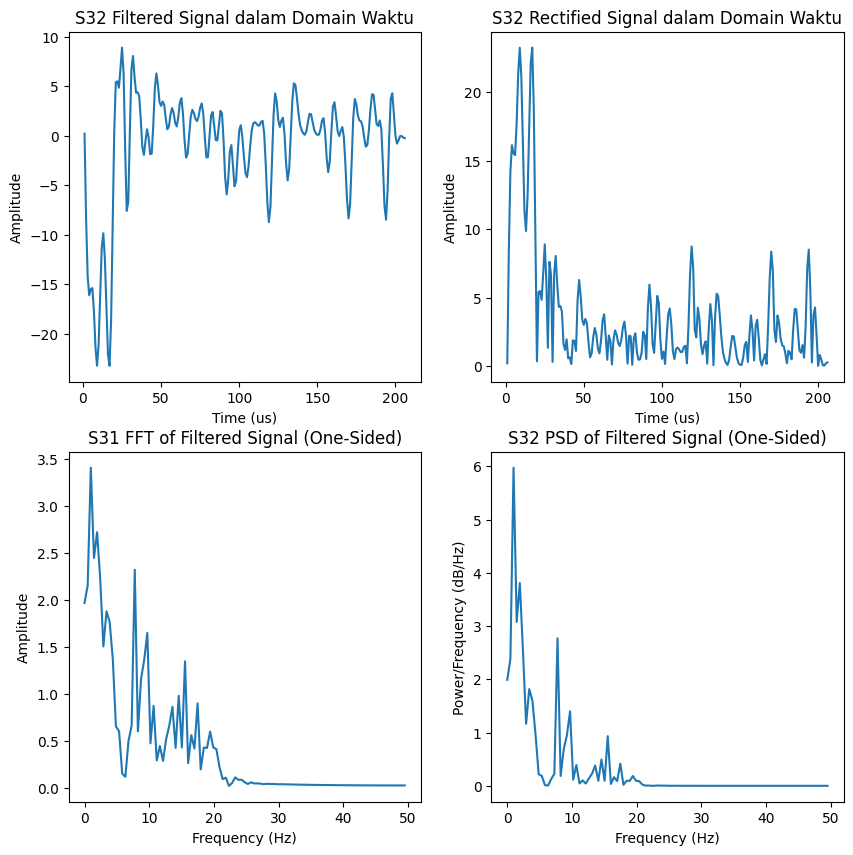

In [59]:
# S32
# Plot the results
fig, axs = plt.subplots(2, 2, figsize=(10,10))

axs[0, 0].plot(time, S32_filtered_signal)
axs[0, 0].set_title('S32 Filtered Signal dalam Domain Waktu')
axs[0, 0].set_xlabel('Time (us)')
axs[0, 0].set_ylabel('Amplitude')

axs[0, 1].plot(time, S32_rectified_signal)
axs[0, 1].set_title('S32 Rectified Signal dalam Domain Waktu')
axs[0, 1].set_xlabel('Time (us)')
axs[0, 1].set_ylabel('Amplitude')

axs[1, 0].plot(S32_freq, S32_fft_amp)
axs[1, 0].set_title('S31 FFT of Filtered Signal (One-Sided)')
axs[1, 0].set_xlabel('Frequency (Hz)')
axs[1, 0].set_ylabel('Amplitude')

axs[1, 1].plot(S32_freq_psd, S32_psd_one_sided)
axs[1, 1].set_title('S32 PSD of Filtered Signal (One-Sided)')
axs[1, 1].set_xlabel('Frequency (Hz)')
axs[1, 1].set_ylabel('Power/Frequency (dB/Hz)')

plt.savefig('Skin_3cm_sampel_2.png', dpi=300)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

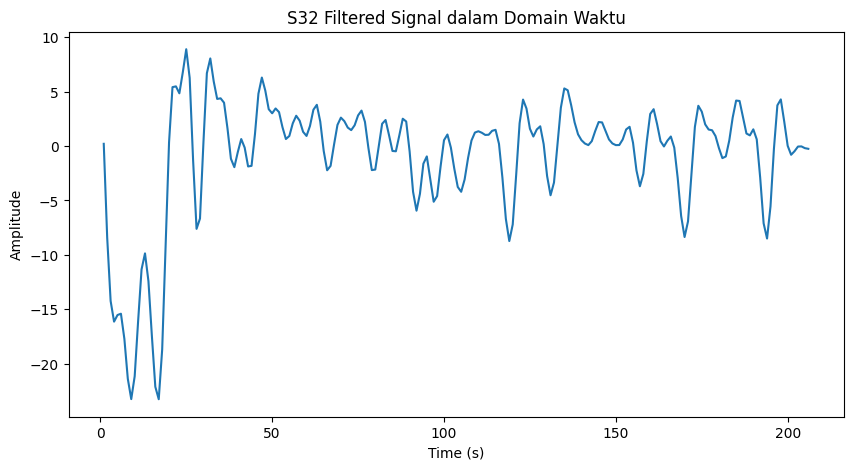

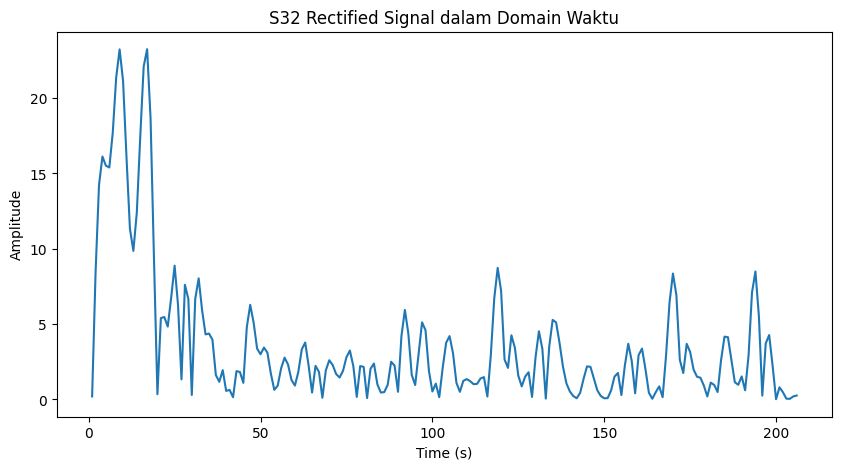

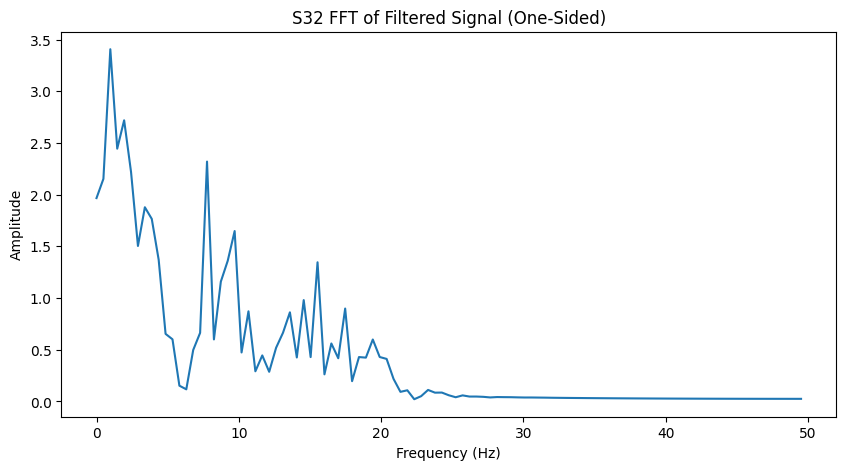

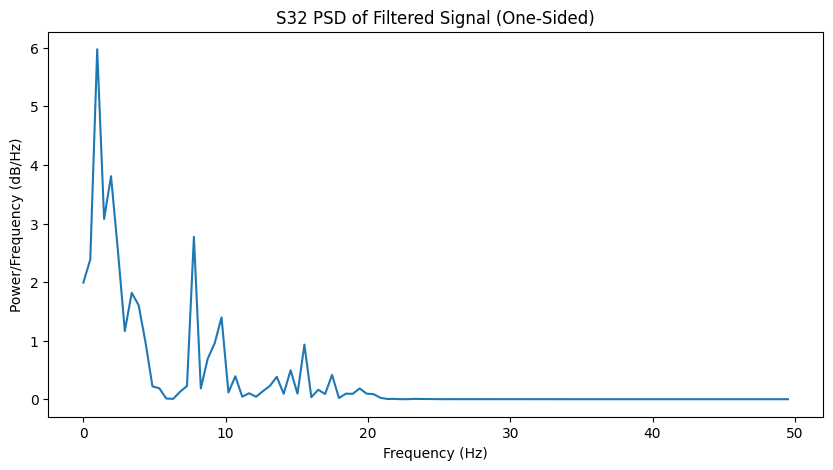

In [60]:
plt.figure(figsize=(10,5))
plt.plot(time, S32_filtered_signal)
plt.title('S32 Filtered Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')


plt.figure(figsize=(10,5))
plt.plot(time, S32_rectified_signal)
plt.title('S32 Rectified Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')


plt.figure(figsize=(10,5))
plt.plot(S32_freq, S32_fft_amp)
plt.title('S32 FFT of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')


plt.figure(figsize=(10,5))
plt.plot(S32_freq_psd, S32_psd_one_sided)
plt.title('S32 PSD of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.show

Text(0, 0.5, 'Amplitude')

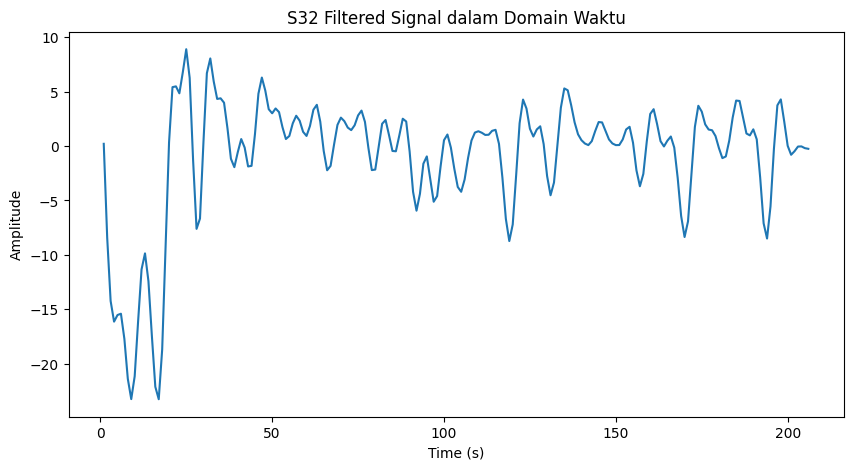

In [61]:
plt.figure(figsize=(10,5))
plt.plot(time, S32_filtered_signal)
plt.title('S32 Filtered Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

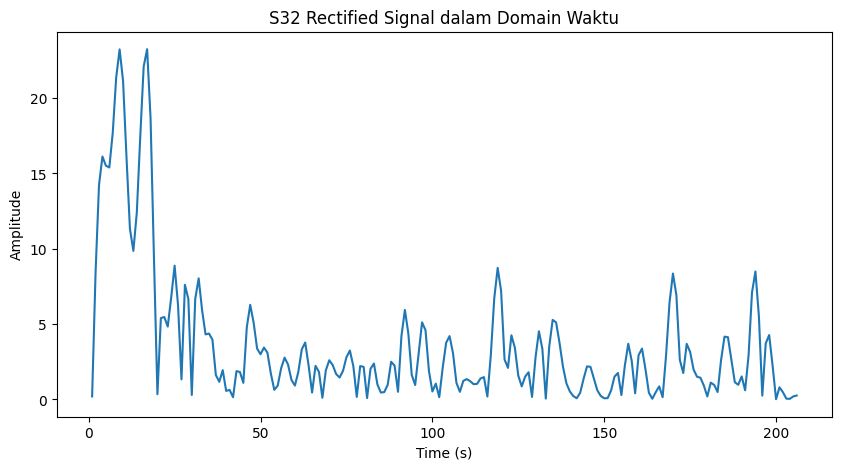

In [62]:
plt.figure(figsize=(10,5))
plt.plot(time, S32_rectified_signal)
plt.title('S32 Rectified Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

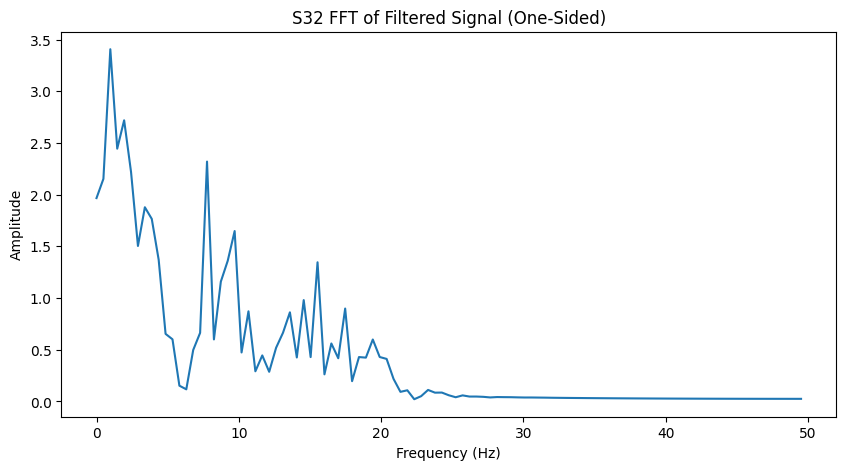

In [63]:
plt.figure(figsize=(10,5))
plt.plot(S32_freq, S32_fft_amp)
plt.title('S32 FFT of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

<function matplotlib.pyplot.show(close=None, block=None)>

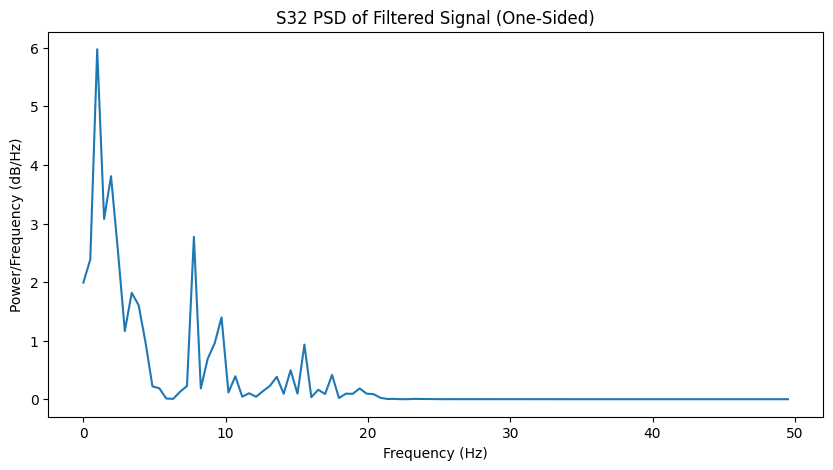

In [64]:
plt.figure(figsize=(10,5))
plt.plot(S32_freq_psd, S32_psd_one_sided)
plt.title('S32 PSD of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.show

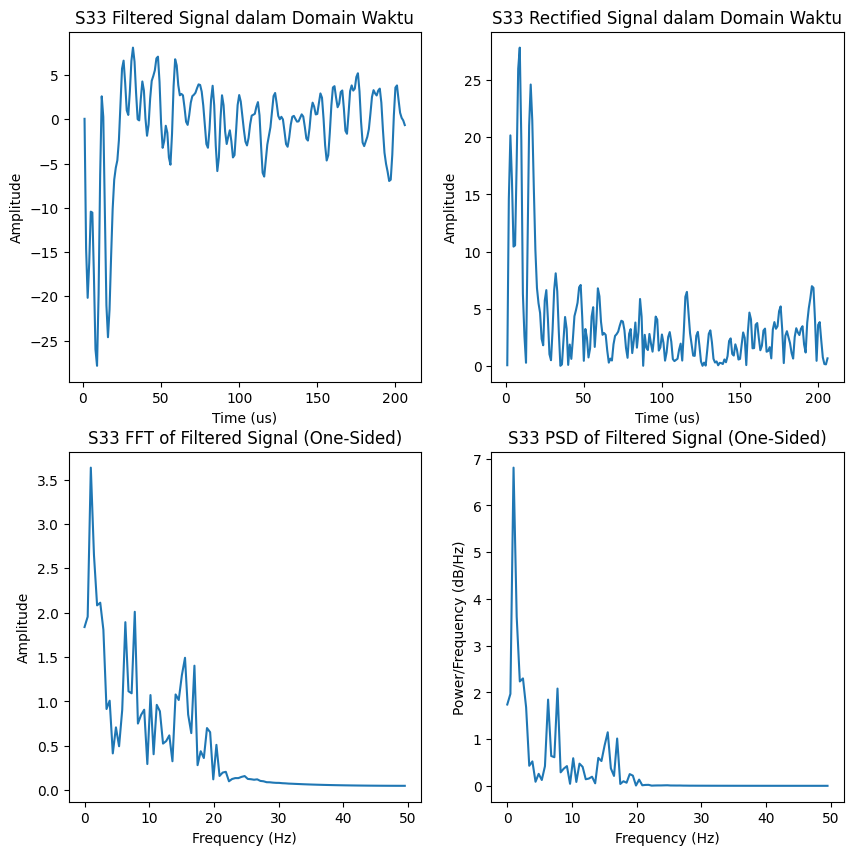

In [65]:
# S33
# Plot the results
fig, axs = plt.subplots(2, 2, figsize=(10,10))

axs[0, 0].plot(time, S33_filtered_signal)
axs[0, 0].set_title('S33 Filtered Signal dalam Domain Waktu')
axs[0, 0].set_xlabel('Time (us)')
axs[0, 0].set_ylabel('Amplitude')

axs[0, 1].plot(time, S33_rectified_signal)
axs[0, 1].set_title('S33 Rectified Signal dalam Domain Waktu')
axs[0, 1].set_xlabel('Time (us)')
axs[0, 1].set_ylabel('Amplitude')

axs[1, 0].plot(S33_freq, S33_fft_amp)
axs[1, 0].set_title('S33 FFT of Filtered Signal (One-Sided)')
axs[1, 0].set_xlabel('Frequency (Hz)')
axs[1, 0].set_ylabel('Amplitude')

axs[1, 1].plot(S33_freq_psd, S33_psd_one_sided)
axs[1, 1].set_title('S33 PSD of Filtered Signal (One-Sided)')
axs[1, 1].set_xlabel('Frequency (Hz)')
axs[1, 1].set_ylabel('Power/Frequency (dB/Hz)')

plt.savefig('Skin_3cm_sampel_3.png', dpi=300)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

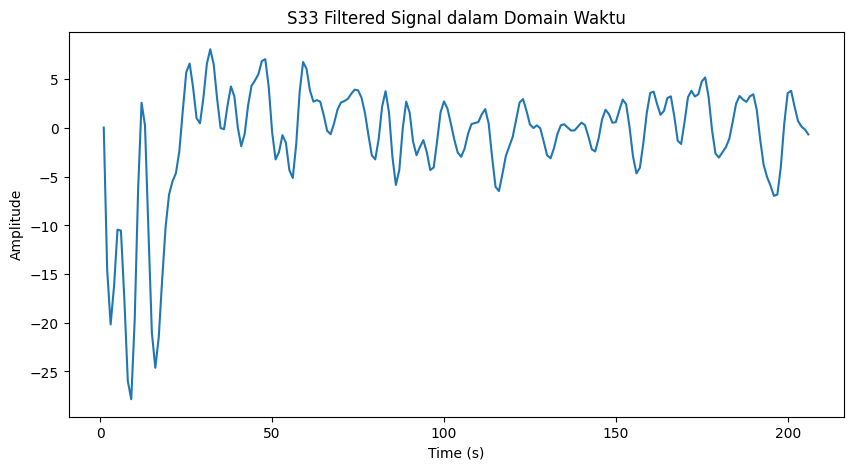

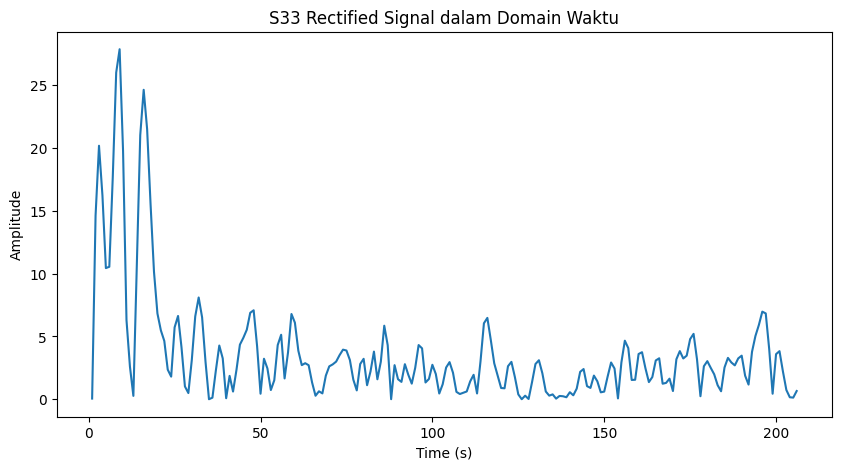

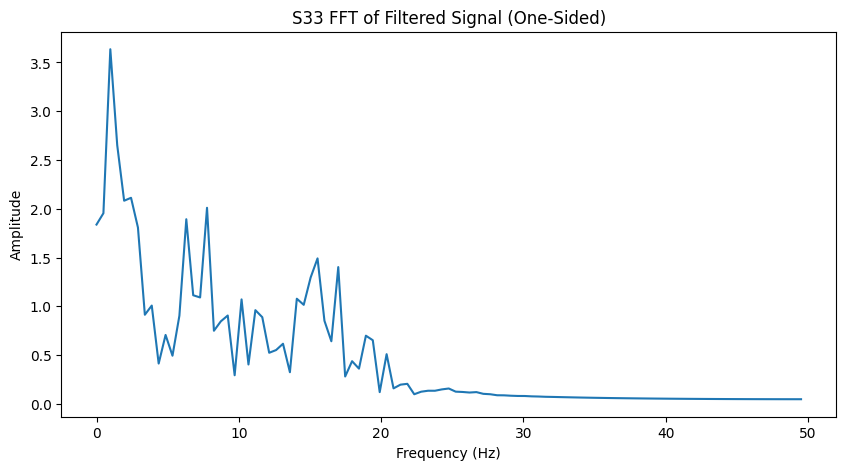

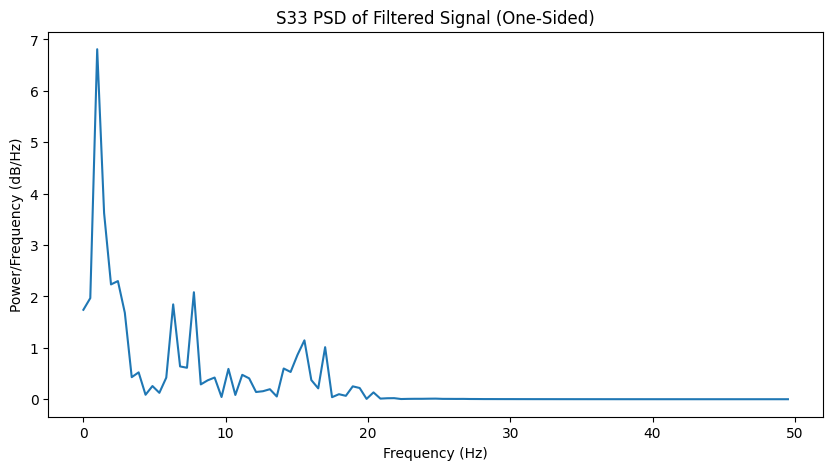

In [66]:
plt.figure(figsize=(10,5))
plt.plot(time, S33_filtered_signal)
plt.title('S33 Filtered Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')


plt.figure(figsize=(10,5))
plt.plot(time, S33_rectified_signal)
plt.title('S33 Rectified Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')


plt.figure(figsize=(10,5))
plt.plot(S33_freq, S33_fft_amp)
plt.title('S33 FFT of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')


plt.figure(figsize=(10,5))
plt.plot(S33_freq_psd, S33_psd_one_sided)
plt.title('S33 PSD of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.show

Text(0, 0.5, 'Amplitude')

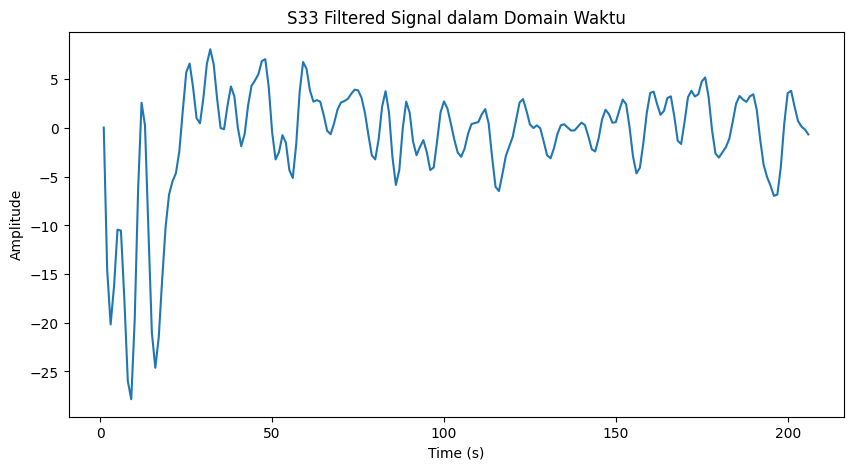

In [67]:
plt.figure(figsize=(10,5))
plt.plot(time, S33_filtered_signal)
plt.title('S33 Filtered Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

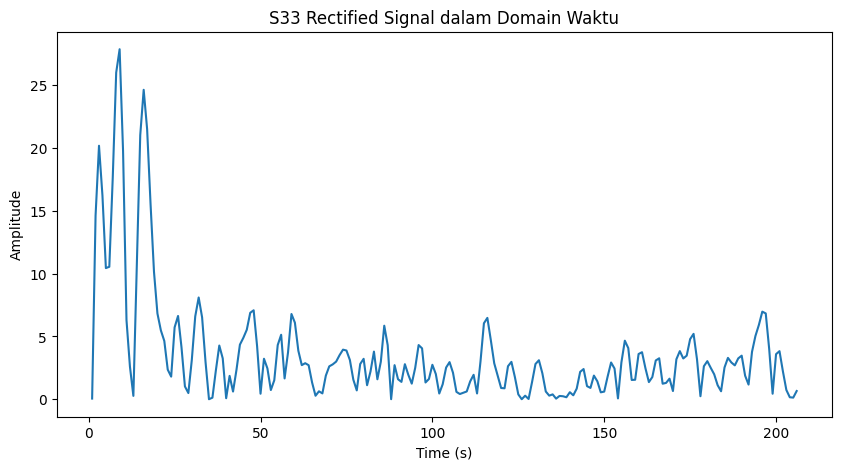

In [68]:
plt.figure(figsize=(10,5))
plt.plot(time, S33_rectified_signal)
plt.title('S33 Rectified Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

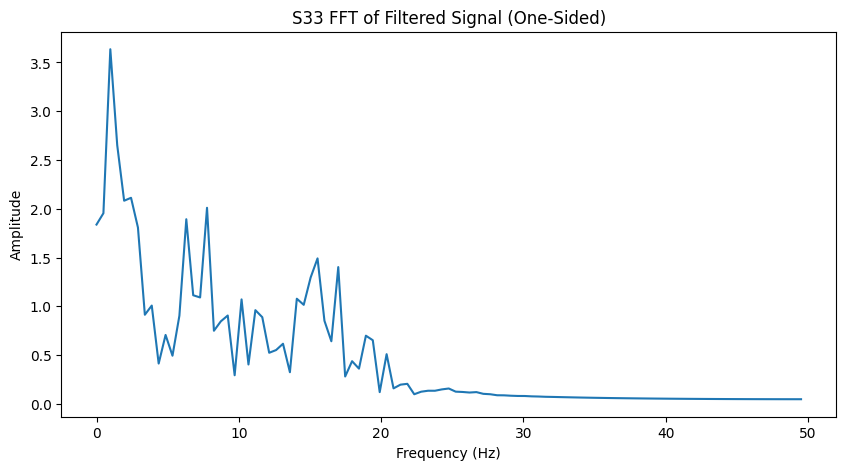

In [69]:
plt.figure(figsize=(10,5))
plt.plot(S33_freq, S33_fft_amp)
plt.title('S33 FFT of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

<function matplotlib.pyplot.show(close=None, block=None)>

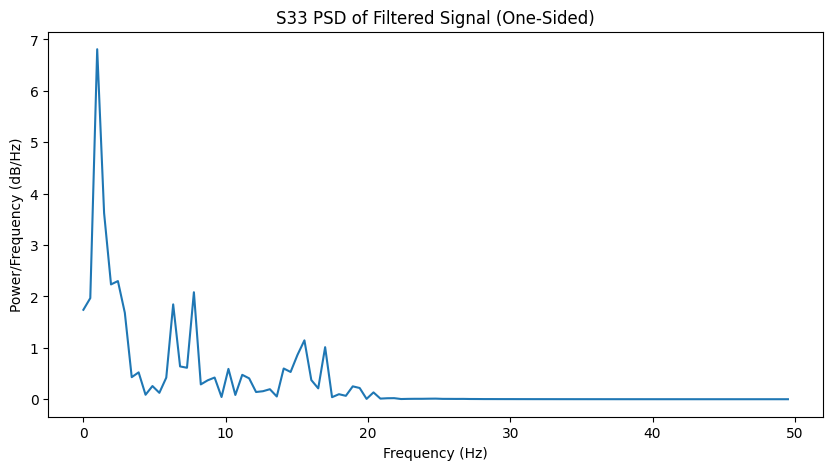

In [70]:
plt.figure(figsize=(10,5))
plt.plot(S33_freq_psd, S33_psd_one_sided)
plt.title('S33 PSD of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.show

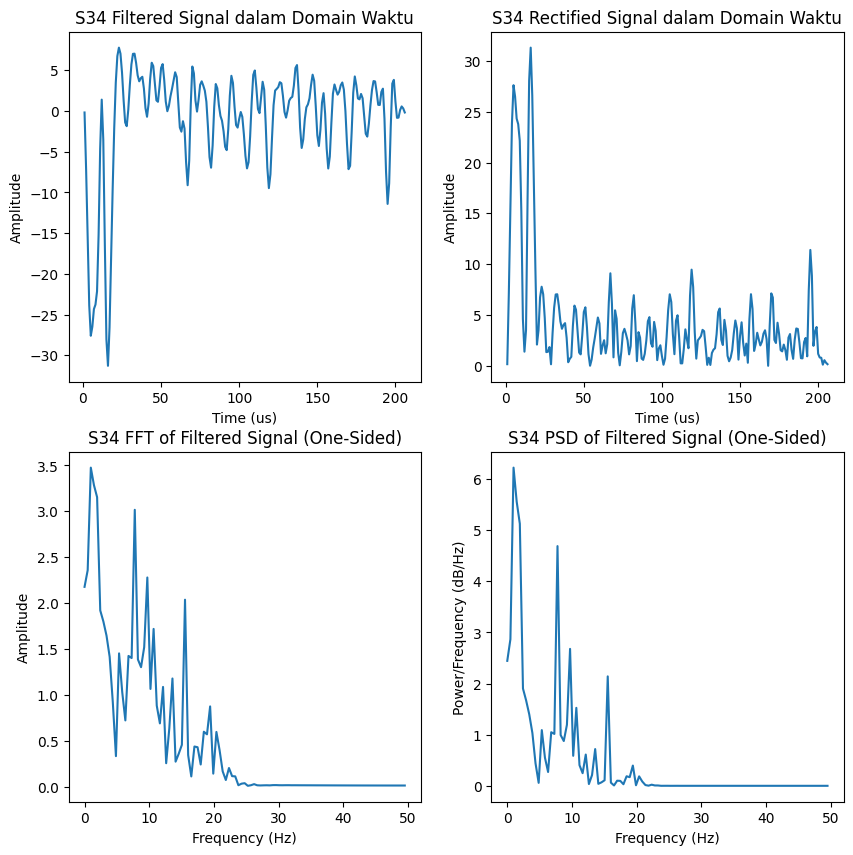

In [71]:
# S34
# Plot the results
fig, axs = plt.subplots(2, 2, figsize=(10,10))

axs[0, 0].plot(time, S34_filtered_signal)
axs[0, 0].set_title('S34 Filtered Signal dalam Domain Waktu')
axs[0, 0].set_xlabel('Time (us)')
axs[0, 0].set_ylabel('Amplitude')

axs[0, 1].plot(time, S34_rectified_signal)
axs[0, 1].set_title('S34 Rectified Signal dalam Domain Waktu')
axs[0, 1].set_xlabel('Time (us)')
axs[0, 1].set_ylabel('Amplitude')

axs[1, 0].plot(S34_freq, S34_fft_amp)
axs[1, 0].set_title('S34 FFT of Filtered Signal (One-Sided)')
axs[1, 0].set_xlabel('Frequency (Hz)')
axs[1, 0].set_ylabel('Amplitude')

axs[1, 1].plot(S34_freq_psd, S34_psd_one_sided)
axs[1, 1].set_title('S34 PSD of Filtered Signal (One-Sided)')
axs[1, 1].set_xlabel('Frequency (Hz)')
axs[1, 1].set_ylabel('Power/Frequency (dB/Hz)')

plt.savefig('Skin_3cm_sampel_4.png', dpi=300)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

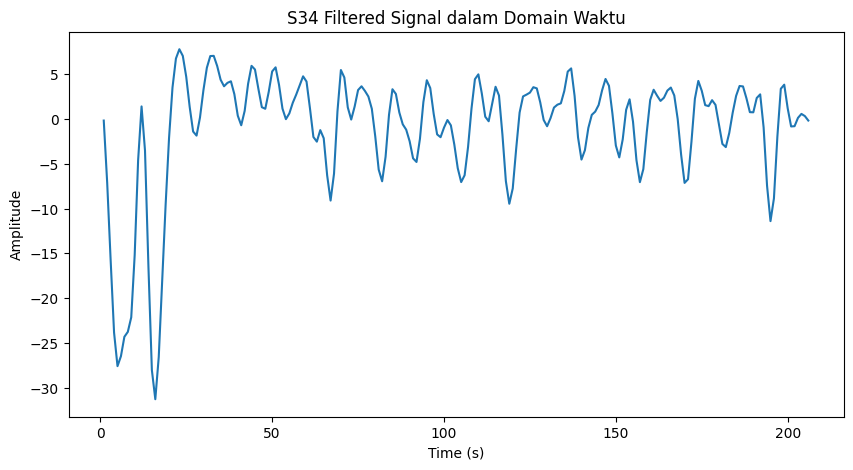

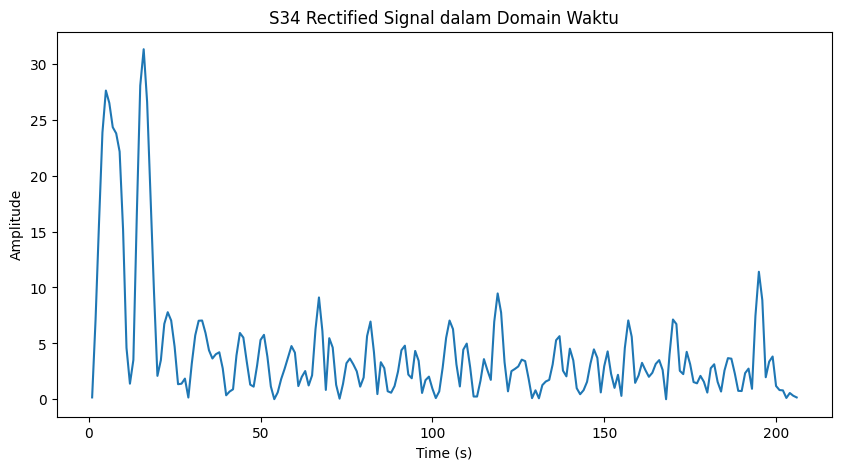

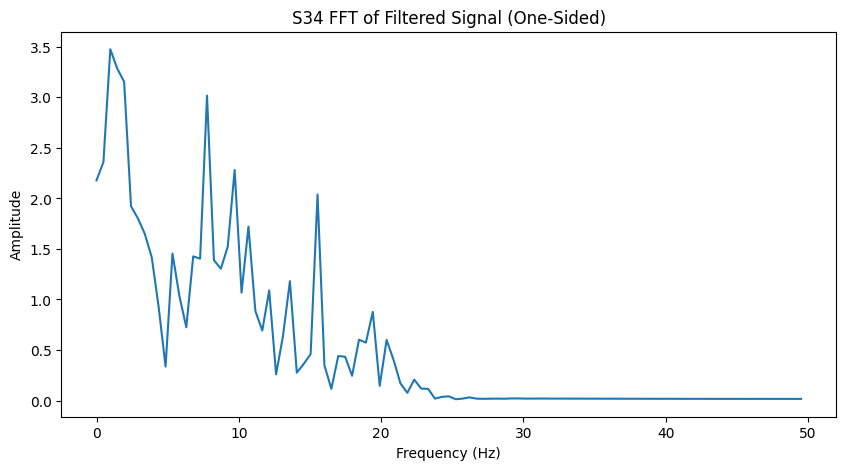

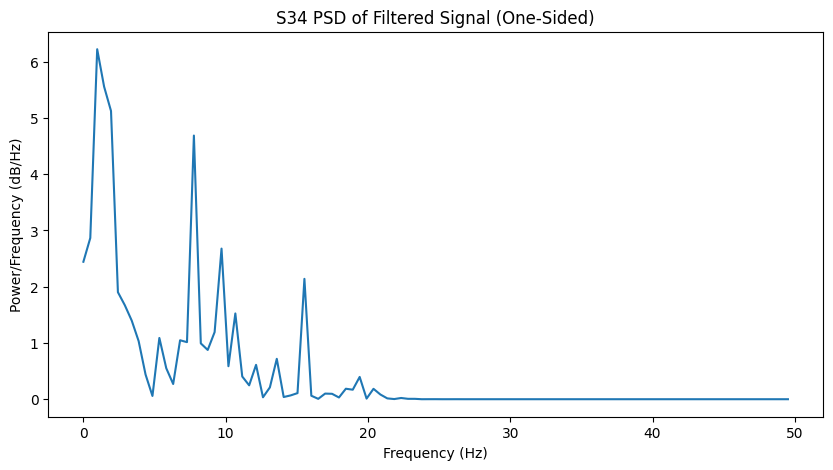

In [72]:
plt.figure(figsize=(10,5))
plt.plot(time, S34_filtered_signal)
plt.title('S34 Filtered Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')


plt.figure(figsize=(10,5))
plt.plot(time, S34_rectified_signal)
plt.title('S34 Rectified Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')


plt.figure(figsize=(10,5))
plt.plot(S34_freq, S34_fft_amp)
plt.title('S34 FFT of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')


plt.figure(figsize=(10,5))
plt.plot(S34_freq_psd, S34_psd_one_sided)
plt.title('S34 PSD of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.show

Text(0, 0.5, 'Amplitude')

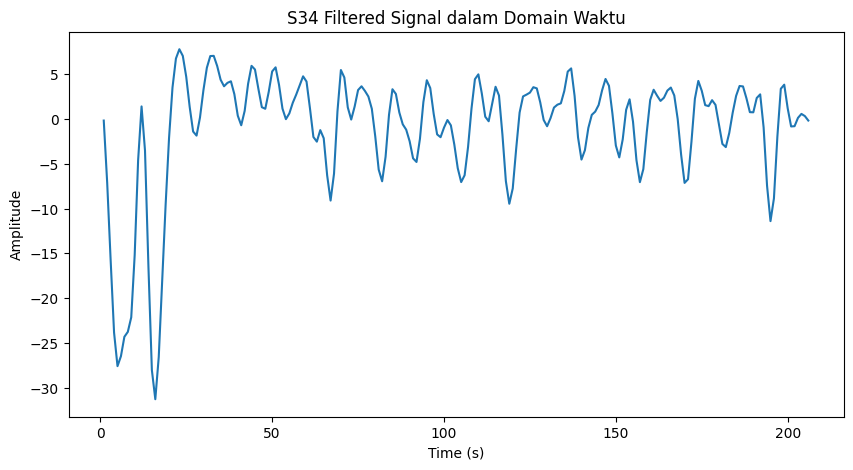

In [73]:
plt.figure(figsize=(10,5))
plt.plot(time, S34_filtered_signal)
plt.title('S34 Filtered Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

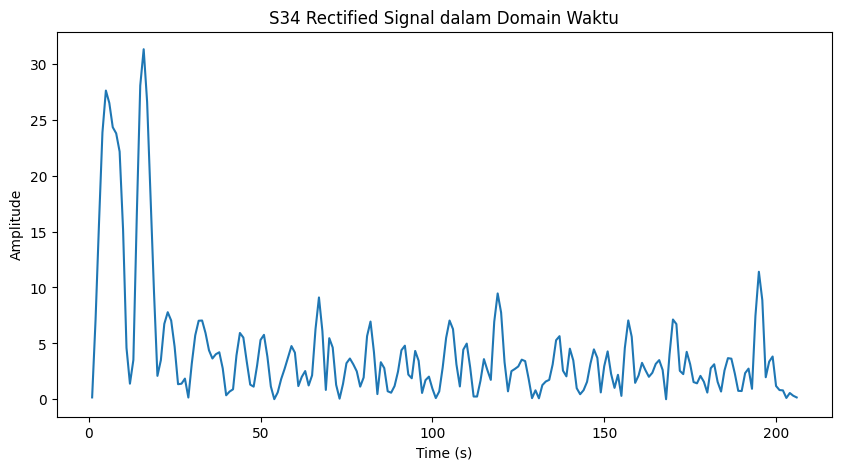

In [74]:
plt.figure(figsize=(10,5))
plt.plot(time, S34_rectified_signal)
plt.title('S34 Rectified Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

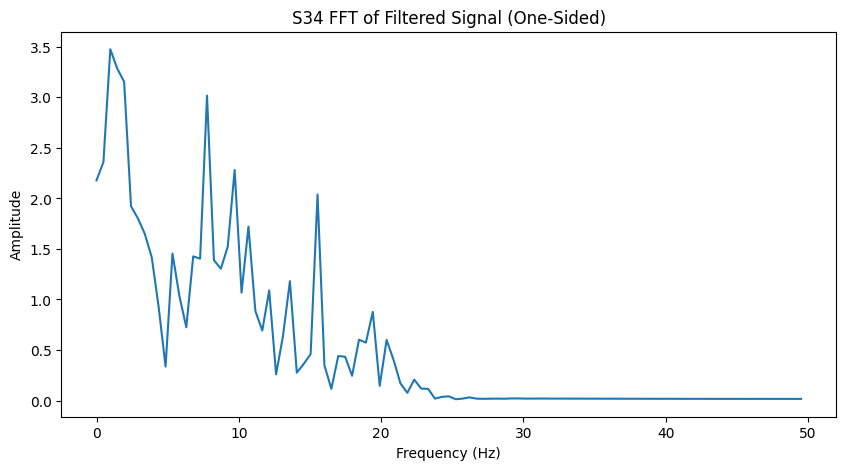

In [75]:
plt.figure(figsize=(10,5))
plt.plot(S34_freq, S34_fft_amp)
plt.title('S34 FFT of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

<function matplotlib.pyplot.show(close=None, block=None)>

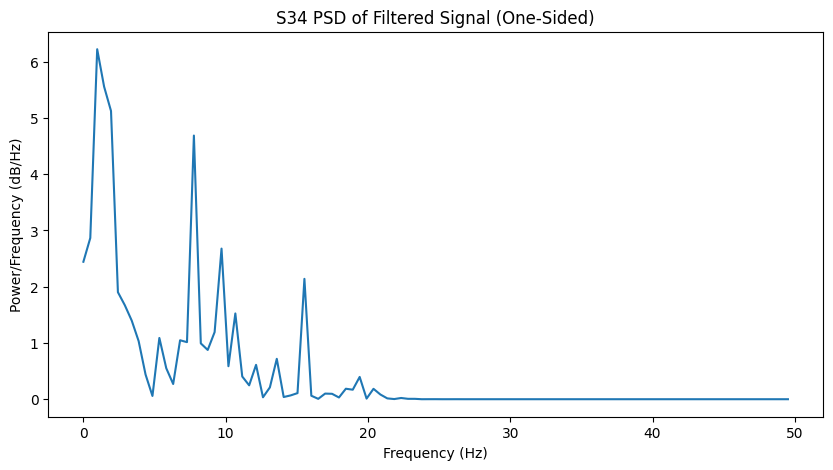

In [76]:
plt.figure(figsize=(10,5))
plt.plot(S34_freq_psd, S34_psd_one_sided)
plt.title('S34 PSD of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.show

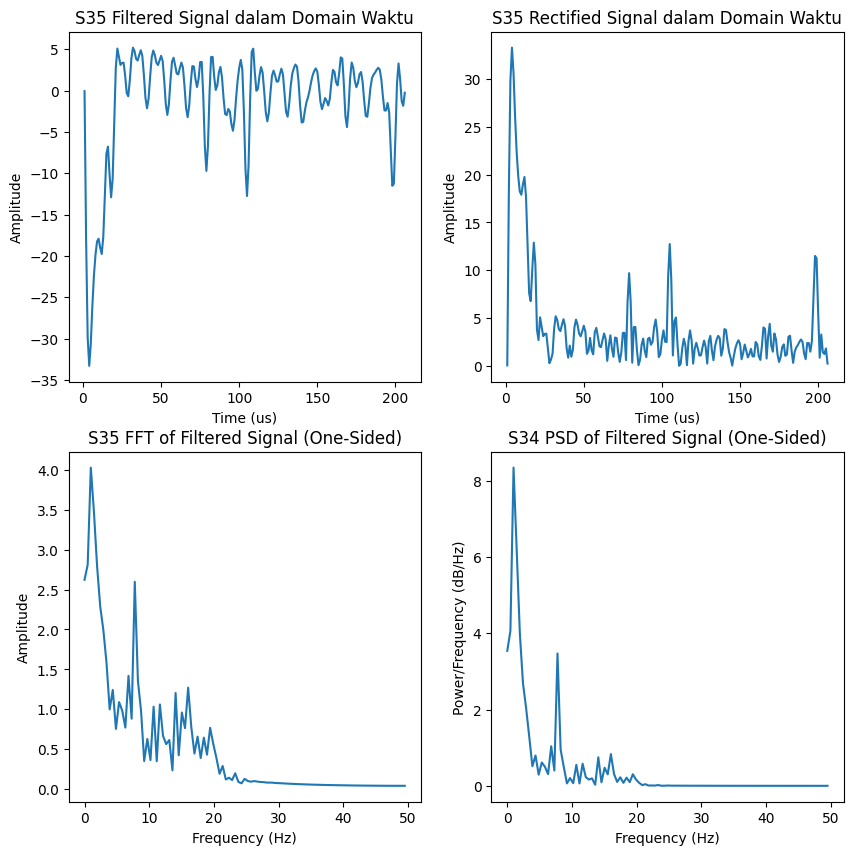

In [77]:
# S35
# Plot the results
fig, axs = plt.subplots(2, 2, figsize=(10,10))

axs[0, 0].plot(time, S35_filtered_signal)
axs[0, 0].set_title('S35 Filtered Signal dalam Domain Waktu')
axs[0, 0].set_xlabel('Time (us)')
axs[0, 0].set_ylabel('Amplitude')

axs[0, 1].plot(time, S35_rectified_signal)
axs[0, 1].set_title('S35 Rectified Signal dalam Domain Waktu')
axs[0, 1].set_xlabel('Time (us)')
axs[0, 1].set_ylabel('Amplitude')

axs[1, 0].plot(S35_freq, S35_fft_amp)
axs[1, 0].set_title('S35 FFT of Filtered Signal (One-Sided)')
axs[1, 0].set_xlabel('Frequency (Hz)')
axs[1, 0].set_ylabel('Amplitude')

axs[1, 1].plot(S35_freq_psd, S35_psd_one_sided)
axs[1, 1].set_title('S34 PSD of Filtered Signal (One-Sided)')
axs[1, 1].set_xlabel('Frequency (Hz)')
axs[1, 1].set_ylabel('Power/Frequency (dB/Hz)')

plt.savefig('Skin_3cm_sampel_5.png', dpi=300)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

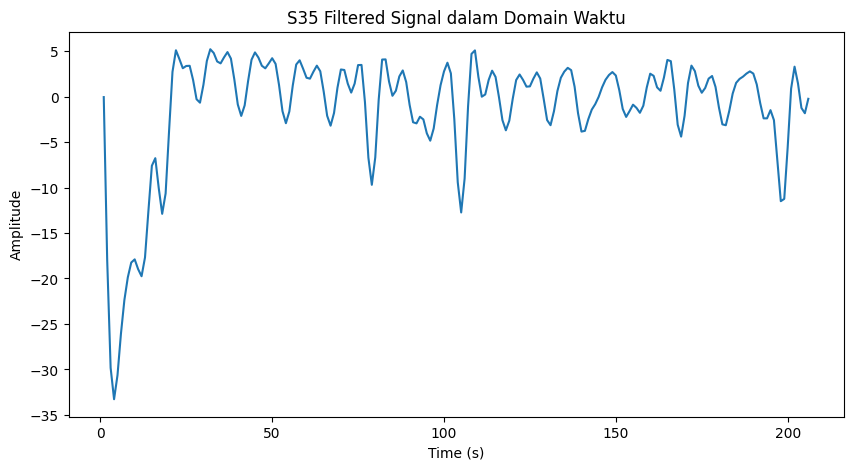

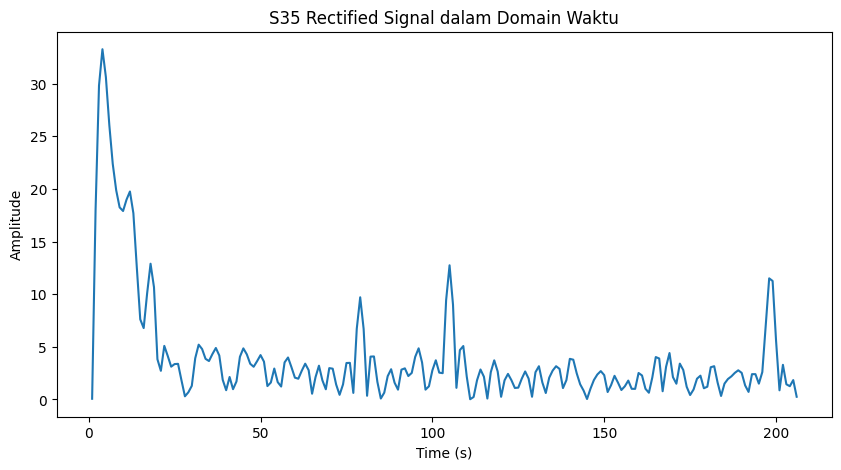

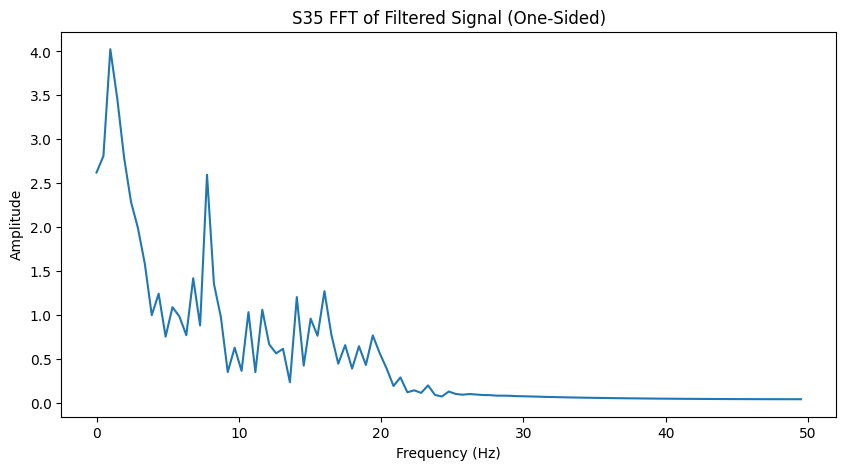

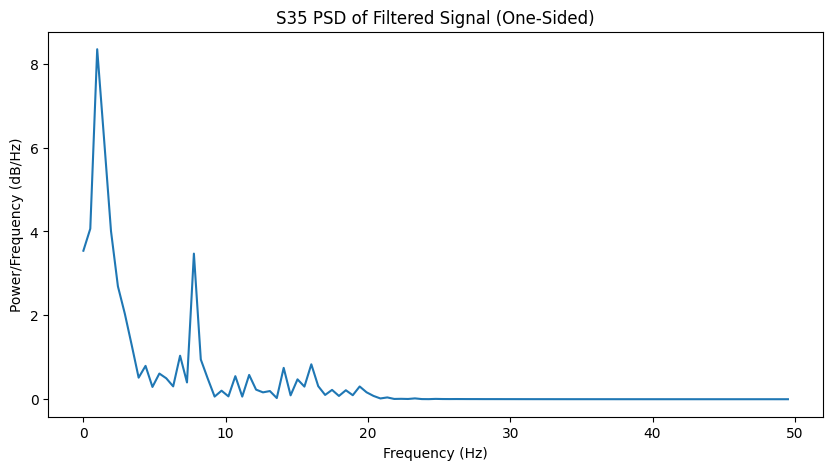

In [78]:
plt.figure(figsize=(10,5))
plt.plot(time, S35_filtered_signal)
plt.title('S35 Filtered Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')


plt.figure(figsize=(10,5))
plt.plot(time, S35_rectified_signal)
plt.title('S35 Rectified Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')


plt.figure(figsize=(10,5))
plt.plot(S35_freq, S35_fft_amp)
plt.title('S35 FFT of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')


plt.figure(figsize=(10,5))
plt.plot(S35_freq_psd, S35_psd_one_sided)
plt.title('S35 PSD of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.show

Text(0, 0.5, 'Amplitude')

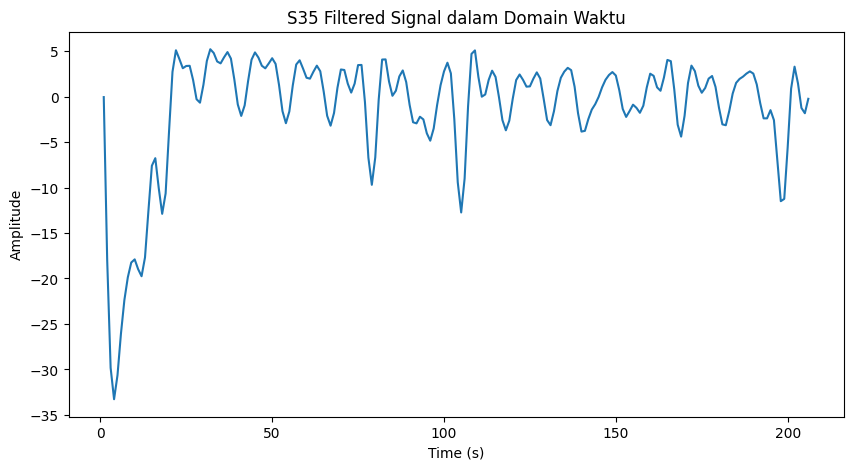

In [79]:
plt.figure(figsize=(10,5))
plt.plot(time, S35_filtered_signal)
plt.title('S35 Filtered Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

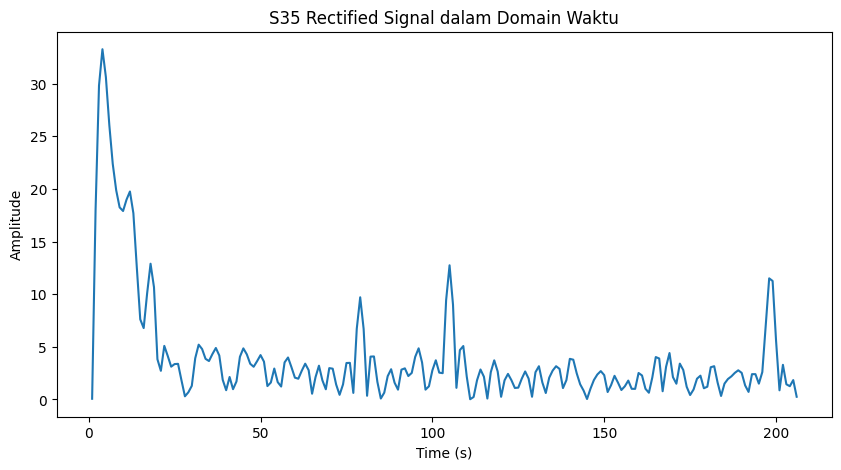

In [80]:
plt.figure(figsize=(10,5))
plt.plot(time, S35_rectified_signal)
plt.title('S35 Rectified Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

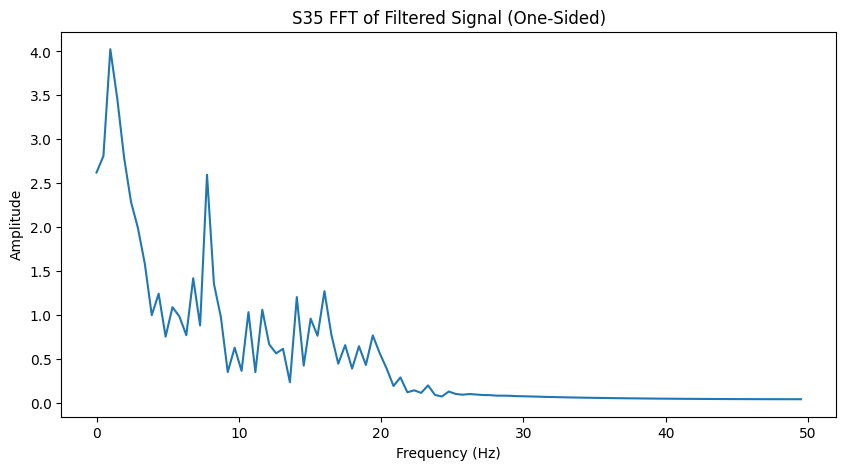

In [81]:
plt.figure(figsize=(10,5))
plt.plot(S35_freq, S35_fft_amp)
plt.title('S35 FFT of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

<function matplotlib.pyplot.show(close=None, block=None)>

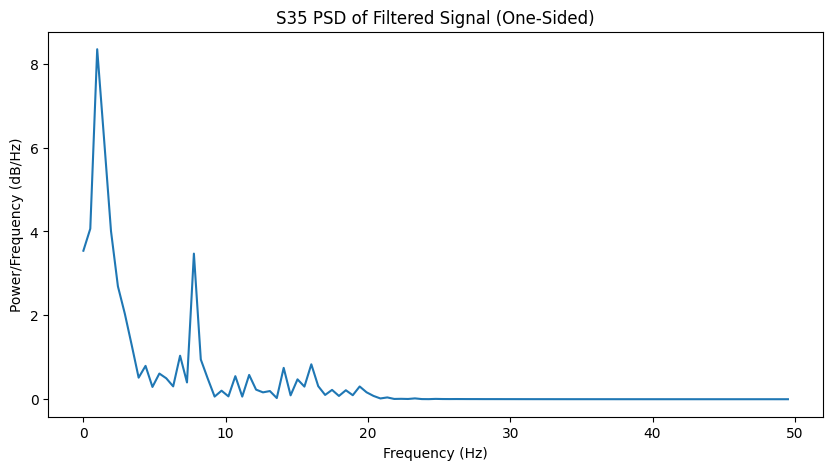

In [82]:
plt.figure(figsize=(10,5))
plt.plot(S35_freq_psd, S35_psd_one_sided)
plt.title('S35 PSD of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.show